# Part I - Communicate Data Findings
## by Prince G Sibanda

# Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The "Question-Visualization-Observations" framework will be used throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation

# Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [5]:
df.Occupation.duplicated().value_counts()

True     113869
False        68
Name: Occupation, dtype: int64

In [6]:
df[df.ListingNumber.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,NaN,60,Current,NaN,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
df.TotalProsperLoans.unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  8.,  7.,  0.])

In [8]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [9]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [10]:
df.EmploymentStatus.isnull().sum()

2255

In [11]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [12]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [13]:
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [14]:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [15]:
df.ListingNumber.nunique()

113066

In [16]:
df.ListingNumber.value_counts()

951186     6
882888     4
1056749    4
892845     4
1057901    4
          ..
1101372    1
343935     1
128572     1
584331     1
1140093    1
Name: ListingNumber, Length: 113066, dtype: int64

In [17]:
df.ListingNumber.duplicated().value_counts()

False    113066
True        871
Name: ListingNumber, dtype: int64

In [18]:
df[df.ListingNumber.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,NaN,60,Current,NaN,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [19]:
df[df.ListingNumber == 882888]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
27178,349D3587495831350F0F648,882888,2013-08-28 20:31:41.107000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-34.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29528,349D3587495831350F0F648,882888,2013-08-28 20:31:41.107000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-34.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
37941,349D3587495831350F0F648,882888,2013-08-28 20:31:41.107000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-34.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
71930,349D3587495831350F0F648,882888,2013-08-28 20:31:41.107000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-34.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


# CLEANING DATA

For purposes of carrying out an analysis relevant to the project, the author selected a subset of the 81 columns of the dataset.

In [20]:
# Select the features that will be useful for the analysis
select=['ListingNumber', 'ListingCategory (numeric)','ListingCreationDate','BorrowerState','Occupation', 'EmploymentStatus', 'EmploymentStatusDuration','StatedMonthlyIncome','IncomeVerifiable', 
       'IsBorrowerHomeowner','CreditGrade', 'BorrowerAPR', 'BorrowerRate','Recommendations',
'LoanNumber','Term','LoanOriginalAmount','MonthlyLoanPayment','TotalProsperLoans', 'ProsperRating (Alpha)','ProsperScore','Investors', 'LoanStatus','ClosedDate']

In [21]:
df_select = df[select]

In [22]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   BorrowerState              108422 non-null  object 
 4   Occupation                 110349 non-null  object 
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   IncomeVerifiable           113937 non-null  bool   
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  CreditGrade                28953 non-null   object 
 11  BorrowerAPR                113912 non-null  float64
 12  BorrowerRate               113937 non-null  float64
 13  Recommendations            11

In [23]:
df_select.sample(10)

,ListingNumber,ListingCategory (numeric),ListingCreationDate,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,...,LoanNumber,Term,LoanOriginalAmount,MonthlyLoanPayment,TotalProsperLoans,ProsperRating (Alpha),ProsperScore,Investors,LoanStatus,ClosedDate
8945,824751,1,2013-06-30 21:20:20.623000000,CA,Skilled Labor,Employed,154.0,5166.666667,True,True,...,95602,36,15000,572.78,NaN,D,3.0,276,Current,NaN
53214,1189421,15,2014-02-10 18:26:22.157000000,NC,Nurse (RN),Employed,20.0,4250.000000,True,True,...,131931,36,3700,158.27,NaN,HR,2.0,1,Current,NaN
85731,931404,1,2013-09-26 18:37:01.180000000,AR,Tradesman - Mechanic,Employed,112.0,5666.666667,True,True,...,104257,36,5000,166.05,NaN,A,6.0,1,Current,NaN
72386,34675,0,2006-08-28 06:46:21.620000000,NaN,Clerical,Not available,NaN,2083.333333,True,False,...,2962,36,2000,83.81,NaN,NaN,NaN,19,Completed,2009-08-31 00:00:00
39917,64789,0,2006-11-21 06:43:30.453000000,IL,Clerical,Not available,NaN,2333.333333,True,False,...,5052,36,6000,225.85,NaN,NaN,NaN,65,Completed,2009-11-30 00:00:00
52563,239506,0,2007-11-28 13:50:51.683000000,WA,Laborer,Part-time,9.0,1690.000000,True,False,...,22618,36,4000,148.65,NaN,NaN,NaN,78,Completed,2010-03-09 00:00:00
17508,1120085,1,2014-01-08 15:54:18.220000000,WA,Executive,Employed,294.0,9095.000000,True,True,...,125916,60,35000,791.71,NaN,B,11.0,466,Current,NaN
1103,483811,1,2010-11-10 15:00:47.787000000,RI,Engineer - Mechanical,Employed,100.0,6160.250000,True,True,...,45522,36,7500,259.62,NaN,B,8.0,227,Defaulted,2012-08-23 00:00:00
548,781657,1,2013-05-17 08:11:08.867000000,SC,Religious,Employed,172.0,4583.333333,True,True,...,90851,36,4000,155.80,2.0,D,4.0,57,Current,NaN
60664,458506,1,2010-05-15 15:51:37.533000000,CA,Biologist,Full-time,25.0,7973.333333,True,False,...,42673,36,2500,106.13,1.0,E,6.0,37,Chargedoff,2013-02-25 00:00:00


In [24]:
df_select.isnull().sum()

ListingNumber                    0
ListingCategory (numeric)        0
ListingCreationDate              0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
StatedMonthlyIncome              0
IncomeVerifiable                 0
IsBorrowerHomeowner              0
CreditGrade                  84984
BorrowerAPR                     25
BorrowerRate                     0
Recommendations                  0
LoanNumber                       0
Term                             0
LoanOriginalAmount               0
MonthlyLoanPayment               0
TotalProsperLoans            91852
ProsperRating (Alpha)        29084
ProsperScore                 29084
Investors                        0
LoanStatus                       0
ClosedDate                   58848
dtype: int64

In [25]:
df_select.isna().sum()/df_select.shape[0]

ListingNumber                0.000000
ListingCategory (numeric)    0.000000
ListingCreationDate          0.000000
BorrowerState                0.048404
Occupation                   0.031491
EmploymentStatus             0.019792
EmploymentStatusDuration     0.066923
StatedMonthlyIncome          0.000000
IncomeVerifiable             0.000000
IsBorrowerHomeowner          0.000000
CreditGrade                  0.745886
BorrowerAPR                  0.000219
BorrowerRate                 0.000000
Recommendations              0.000000
LoanNumber                   0.000000
Term                         0.000000
LoanOriginalAmount           0.000000
MonthlyLoanPayment           0.000000
TotalProsperLoans            0.806165
ProsperRating (Alpha)        0.255264
ProsperScore                 0.255264
Investors                    0.000000
LoanStatus                   0.000000
ClosedDate                   0.516496
dtype: float64

In [26]:
df_select.describe()

,ListingNumber,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,Recommendations,LoanNumber,Term,LoanOriginalAmount,MonthlyLoanPayment,TotalProsperLoans,ProsperScore,Investors
count,1.139370e+05,113937.000000,106312.000000,1.139370e+05,113912.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,22085.000000,84853.000000,113937.000000
mean,6.278857e+05,2.774209,96.071582,5.608026e+03,0.218828,0.192764,0.048027,69444.474271,40.830248,8337.01385,272.475783,1.421100,5.950067,80.475228
std,3.280762e+05,3.996797,94.480605,7.478497e+03,0.080364,0.074818,0.332353,38930.479610,10.436212,6245.80058,192.697812,0.764042,2.376501,103.239020
min,4.000000e+00,0.000000,0.000000,0.000000e+00,0.006530,0.000000,0.000000,1.000000,12.000000,1000.00000,0.000000,0.000000,1.000000,1.000000
25%,4.009190e+05,1.000000,26.000000,3.200333e+03,0.156290,0.134000,0.000000,37332.000000,36.000000,4000.00000,131.620000,1.000000,4.000000,2.000000
50%,6.005540e+05,1.000000,67.000000,4.666667e+03,0.209760,0.184000,0.000000,68599.000000,36.000000,6500.00000,217.740000,1.000000,6.000000,44.000000
75%,8.926340e+05,3.000000,137.000000,6.825000e+03,0.283810,0.250000,0.000000,101901.000000,36.000000,12000.00000,371.580000,2.000000,8.000000,115.000000
max,1.255725e+06,20.000000,755.000000,1.750003e+06,0.512290,0.497500,39.000000,136486.000000,60.000000,35000.00000,2251.510000,8.000000,11.000000,1189.000000


In [27]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   BorrowerState              108422 non-null  object 
 4   Occupation                 110349 non-null  object 
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   IncomeVerifiable           113937 non-null  bool   
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  CreditGrade                28953 non-null   object 
 11  BorrowerAPR                113912 non-null  float64
 12  BorrowerRate               113937 non-null  float64
 13  Recommendations            11

In [28]:
df_clean = df_select.copy()

In [29]:
# subsetting to listings after July 2009
df_clean = df_select[df_select.ListingCreationDate >= '2009-08-01']

In [30]:
df_clean.ListingCreationDate.value_counts().sort_values(ascending = False)

2013-10-02 17:20:16.550000000    6
2013-12-06 11:44:58.283000000    4
2013-09-08 09:27:44.853000000    4
2013-08-28 20:31:41.107000000    4
2013-12-06 05:43:13.830000000    4
                                ..
2011-08-02 18:51:54.977000000    1
2013-10-11 04:55:15.443000000    1
2014-01-21 14:34:09.207000000    1
2013-07-26 09:00:05.523000000    1
2014-01-15 09:27:37.657000000    1
Name: ListingCreationDate, Length: 83799, dtype: int64

##### Define
Splitting ListingCreationDate column into year,month,day,time

##### Code

In [31]:
df_clean['Year']=df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_clean['Month'] = df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\2107682591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year']=df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\2107682591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)


In [32]:
df_clean['ListingCreationDate'] = df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)
df_clean['Day'] = df_clean['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_clean['Time'] = df_clean['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\649713372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ListingCreationDate'] = df_clean['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)
C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\649713372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Day'] = df_clean['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\649713372.py:3: SettingWithCopyW

In [33]:
df_clean.Day.unique()

array(['27', '22', '14', '12', '05', '02', '10', '15', '19', '16', '20',
       '21', '30', '03', '17', '24', '11', '13', '08', '01', '26', '25',
       '23', '04', '18', '31', '29', '07', '09', '06', '28'], dtype=object)

##### Define
Replace numerical values of month with names

##### Code

In [34]:

df_clean.Month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\4259341266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)


##### Test

In [35]:
df_clean.Month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

##### Define
Drop the original ListingCreationDate column

##### Code

In [36]:
df_clean.drop(columns = ['ListingCreationDate', 'Time'],inplace = True)

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\9365584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns = ['ListingCreationDate', 'Time'],inplace = True)


##### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84672 non-null  int64  
 1   ListingCategory (numeric)  84672 non-null  int64  
 2   BorrowerState              84672 non-null  object 
 3   Occupation                 83339 non-null  object 
 4   EmploymentStatus           84672 non-null  object 
 5   EmploymentStatusDuration   84653 non-null  float64
 6   StatedMonthlyIncome        84672 non-null  float64
 7   IncomeVerifiable           84672 non-null  bool   
 8   IsBorrowerHomeowner        84672 non-null  bool   
 9   CreditGrade                0 non-null      object 
 10  BorrowerAPR                84672 non-null  float64
 11  BorrowerRate               84672 non-null  float64
 12  Recommendations            84672 non-null  int64  
 13  LoanNumber                 84672 non-null  in

##### Define
Filling missing values for the Occupation as unknown

##### Code

In [38]:
df_clean.Occupation = df_clean.Occupation.fillna('Unknown')

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\413610729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Occupation = df_clean.Occupation.fillna('Unknown')


##### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              84672 non-null  int64  
 1   ListingCategory (numeric)  84672 non-null  int64  
 2   BorrowerState              84672 non-null  object 
 3   Occupation                 84672 non-null  object 
 4   EmploymentStatus           84672 non-null  object 
 5   EmploymentStatusDuration   84653 non-null  float64
 6   StatedMonthlyIncome        84672 non-null  float64
 7   IncomeVerifiable           84672 non-null  bool   
 8   IsBorrowerHomeowner        84672 non-null  bool   
 9   CreditGrade                0 non-null      object 
 10  BorrowerAPR                84672 non-null  float64
 11  BorrowerRate               84672 non-null  float64
 12  Recommendations            84672 non-null  int64  
 13  LoanNumber                 84672 non-null  in

In [40]:
#Filling the nan values with 0
df_clean['TotalProsperLoans'] = df_clean['TotalProsperLoans'].fillna(0)

C:\Users\pgsib\AppData\Local\Temp\ipykernel_14832\4074863837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalProsperLoans'] = df_clean['TotalProsperLoans'].fillna(0)


In [41]:
# Selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset and filling in missing values is not possible.
df_clean = df_clean[df_clean['ProsperRating (Alpha)'].notnull()]

#### Define
column names to be renamed

#### Code

In [42]:
df_clean.rename(columns = {'ProsperRating (Alpha)':'ProsperRating_Alpha', 'ListingCategory (numeric)': 'ListingCategory'}, inplace = True)

In [43]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ListingNumber             84672 non-null  int64  
 1   ListingCategory           84672 non-null  int64  
 2   BorrowerState             84672 non-null  object 
 3   Occupation                84672 non-null  object 
 4   EmploymentStatus          84672 non-null  object 
 5   EmploymentStatusDuration  84653 non-null  float64
 6   StatedMonthlyIncome       84672 non-null  float64
 7   IncomeVerifiable          84672 non-null  bool   
 8   IsBorrowerHomeowner       84672 non-null  bool   
 9   CreditGrade               0 non-null      object 
 10  BorrowerAPR               84672 non-null  float64
 11  BorrowerRate              84672 non-null  float64
 12  Recommendations           84672 non-null  int64  
 13  LoanNumber                84672 non-null  int64  
 14  Term 

Define: mapping of listing categories and datatype conversion

##### Code

In [44]:
df_clean.ListingCategory.replace({0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}, inplace=True)

df_clean['ListingCategory'] = df_clean['ListingCategory'].astype('category')

##### Test

In [45]:
df_clean.ListingCategory.dtypes

CategoricalDtype(categories=['Auto', 'Baby & Adoption', 'Boat', 'Business',
                  'Cosmetic Procedure', 'Debt Consolidation',
                  'Engagement Ring', 'Green Loans', 'Home Improvement',
                  'Household Expenses', 'Large Purchases', 'Medical or Dental',
                  'Motorcycle', 'Not Available', 'Other', 'RV', 'Student Use',
                  'Taxes', 'Vacation', 'Wedding Loans'],
, ordered=False)

Define: BorrowerState datatype conversion

##### Code

In [46]:
df_clean['BorrowerState'] = df_clean['BorrowerState'].astype('category')

##### Test

In [47]:
df_clean.BorrowerState.dtypes

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
                  'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM',
                  'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
                  'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
, ordered=False)

Define: employment status datatype conversion

##### Code

In [48]:
df_clean['EmploymentStatus'] = df_clean['EmploymentStatus'].astype('category')

##### Test

In [49]:
df_clean.EmploymentStatus.dtypes

CategoricalDtype(categories=['Employed', 'Full-time', 'Not employed', 'Other',
                  'Part-time', 'Retired', 'Self-employed'],
, ordered=False)

Define: loanstatus datatype conversion

##### Code

In [50]:
df_clean.LoanStatus = df_clean.LoanStatus.astype('category')

##### Test

In [51]:
df_clean.LoanStatus.dtypes

CategoricalDtype(categories=['Chargedoff', 'Completed', 'Current', 'Defaulted',
                  'FinalPaymentInProgress', 'Past Due (1-15 days)',
                  'Past Due (16-30 days)', 'Past Due (31-60 days)',
                  'Past Due (61-90 days)', 'Past Due (91-120 days)',
                  'Past Due (>120 days)'],
, ordered=False)

##### Define
Term datatype conversion

##### Code

In [52]:
loan_term = df_clean.Term.unique().tolist().sort()
Lloan_term = pd.api.types.CategoricalDtype(ordered=True, categories=loan_term)
df_clean.Term = df_clean.Term.astype(Lloan_term)

##### Test

In [53]:
df_clean.Term.dtypes

CategoricalDtype(categories=[12, 36, 60], ordered=True)

#### Define
Round off the income values to 2 decimal places

##### Code

In [54]:
df_clean.StatedMonthlyIncome = df_clean.StatedMonthlyIncome.round(2)

##### Test

In [55]:
df_clean.head(3)

,ListingNumber,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,CreditGrade,...,MonthlyLoanPayment,TotalProsperLoans,ProsperRating_Alpha,ProsperScore,Investors,LoanStatus,ClosedDate,Year,Month,Day
1,1209647,Home Improvement,CO,Professional,Employed,44.0,6125.00,True,False,NaN,...,318.93,0.0,A,7.0,1,Current,NaN,2014,Feb,27
3,658116,Motorcycle,GA,Skilled Labor,Employed,113.0,2875.00,True,True,NaN,...,321.45,0.0,A,9.0,158,Current,NaN,2012,Oct,22
4,909464,Home Improvement,MN,Executive,Employed,44.0,9583.33,True,True,NaN,...,563.97,1.0,D,4.0,20,Current,NaN,2013,Sept,14


##### Define
Checking and Drop duplicates in the dataset

##### Code

In [56]:
df_clean.duplicated().value_counts()

False    84672
dtype: int64

In [57]:
df_clean.ListingNumber.duplicated().value_counts()

False    83801
True       871
Name: ListingNumber, dtype: int64

In [58]:
df_clean.ListingNumber.value_counts()

951186     6
882888     4
1057901    4
1056749    4
892845     4
          ..
492076     1
1054353    1
464556     1
612532     1
1140093    1
Name: ListingNumber, Length: 83801, dtype: int64

In [59]:
df_clean[df_clean.ListingNumber.duplicated()]

,ListingNumber,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,CreditGrade,...,MonthlyLoanPayment,TotalProsperLoans,ProsperRating_Alpha,ProsperScore,Investors,LoanStatus,ClosedDate,Year,Month,Day
9,1023355,Other,IL,Food Service,Employed,269.0,3333.33,True,True,NaN,...,305.54,0.0,AA,11.0,1,Current,NaN,2013,Dec,02
999,1055932,Debt Consolidation,MD,Other,Employed,100.0,3750.00,True,True,NaN,...,239.74,0.0,B,7.0,1,Current,NaN,2013,Dec,18
2539,1097584,Debt Consolidation,NJ,Police Officer/Correction Officer,Employed,107.0,10833.33,True,True,NaN,...,782.81,0.0,B,10.0,1,Current,NaN,2014,Jan,11
4942,927246,Other,MI,Laborer,Employed,336.0,4583.33,True,True,NaN,...,172.76,0.0,HR,2.0,40,Current,NaN,2013,Sept,26
5812,920397,Debt Consolidation,GA,Unknown,Other,0.0,4166.67,True,True,NaN,...,560.90,0.0,C,4.0,1,Current,NaN,2013,Sept,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,1158474,Taxes,CO,Other,Employed,0.0,7666.67,True,True,NaN,...,367.81,0.0,D,8.0,1,Current,NaN,2014,Jan,23
113636,904020,Debt Consolidation,WI,Unknown,Other,0.0,2500.00,True,True,NaN,...,143.81,0.0,C,6.0,1,Current,NaN,2013,Sept,17
113733,1002326,Debt Consolidation,WI,Skilled Labor,Employed,280.0,4583.33,True,False,NaN,...,254.97,0.0,B,8.0,66,Current,NaN,2013,Nov,07
113773,1056749,Debt Consolidation,NJ,Other,Employed,26.0,2720.83,True,True,NaN,...,335.69,0.0,B,6.0,1,Current,NaN,2013,Dec,06


In [60]:
df_clean[df_clean.ListingNumber == 951186]

,ListingNumber,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,CreditGrade,...,MonthlyLoanPayment,TotalProsperLoans,ProsperRating_Alpha,ProsperScore,Investors,LoanStatus,ClosedDate,Year,Month,Day
13078,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,4.0,96,Current,NaN,2013,Oct,02
14888,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,8.0,96,Current,NaN,2013,Oct,02
20569,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,7.0,96,Current,NaN,2013,Oct,02
31450,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,10.0,96,Current,NaN,2013,Oct,02
42750,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,5.0,96,Current,NaN,2013,Oct,02
42751,951186,Debt Consolidation,MD,Other,Employed,26.0,3000.0,True,False,NaN,...,234.5,0.0,B,6.0,96,Current,NaN,2013,Oct,02


In [61]:
#there are duplicate listing numbers with observations that only differ in the prosper scores
df_clean.query('ListingNumber == 892845')

,ListingNumber,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,CreditGrade,...,MonthlyLoanPayment,TotalProsperLoans,ProsperRating_Alpha,ProsperScore,Investors,LoanStatus,ClosedDate,Year,Month,Day
51530,892845,Debt Consolidation,NY,Tradesman - Mechanic,Employed,271.0,6666.67,True,False,NaN,...,215.38,0.0,C,1.0,1,Current,NaN,2013,Sept,08
56146,892845,Debt Consolidation,NY,Tradesman - Mechanic,Employed,271.0,6666.67,True,False,NaN,...,215.38,0.0,C,4.0,1,Current,NaN,2013,Sept,08
103625,892845,Debt Consolidation,NY,Tradesman - Mechanic,Employed,271.0,6666.67,True,False,NaN,...,215.38,0.0,C,5.0,1,Current,NaN,2013,Sept,08
110394,892845,Debt Consolidation,NY,Tradesman - Mechanic,Employed,271.0,6666.67,True,False,NaN,...,215.38,0.0,C,3.0,1,Current,NaN,2013,Sept,08


#### Code

In [62]:
df_clean=df_clean.drop_duplicates(subset=["ListingNumber"],keep="first")
df_clean

,ListingNumber,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,CreditGrade,...,MonthlyLoanPayment,TotalProsperLoans,ProsperRating_Alpha,ProsperScore,Investors,LoanStatus,ClosedDate,Year,Month,Day
1,1209647,Home Improvement,CO,Professional,Employed,44.0,6125.00,True,False,NaN,...,318.93,0.0,A,7.0,1,Current,NaN,2014,Feb,27
3,658116,Motorcycle,GA,Skilled Labor,Employed,113.0,2875.00,True,True,NaN,...,321.45,0.0,A,9.0,158,Current,NaN,2012,Oct,22
4,909464,Home Improvement,MN,Executive,Employed,44.0,9583.33,True,True,NaN,...,563.97,1.0,D,4.0,20,Current,NaN,2013,Sept,14
5,1074836,Debt Consolidation,NM,Professional,Employed,82.0,8333.33,True,True,NaN,...,342.37,0.0,B,10.0,1,Current,NaN,2013,Dec,14
6,750899,Debt Consolidation,KS,Sales - Retail,Employed,172.0,2083.33,True,False,NaN,...,122.67,0.0,E,2.0,1,Current,NaN,2013,Apr,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,Debt Consolidation,IL,Food Service Management,Employed,246.0,4333.33,True,True,NaN,...,364.74,0.0,C,5.0,1,Current,NaN,2013,Apr,14
113933,537216,Other,PA,Professional,Employed,21.0,8041.67,True,True,NaN,...,65.57,3.0,A,8.0,22,FinalPaymentInProgress,NaN,2011,Nov,03
113934,1069178,Debt Consolidation,TX,Other,Employed,84.0,2875.00,True,True,NaN,...,273.35,0.0,D,3.0,119,Current,NaN,2013,Dec,13
113935,539056,Home Improvement,GA,Food Service,Full-time,94.0,3875.00,True,True,NaN,...,449.55,1.0,C,5.0,274,Completed,2013-08-13 00:00:00,2011,Nov,14


##### Test

In [63]:
df_clean.ListingNumber.duplicated().value_counts()

False    83801
Name: ListingNumber, dtype: int64

In [64]:
df_clean.ListingNumber.nunique()

83801

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83801 entries, 1 to 113936
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingNumber             83801 non-null  int64   
 1   ListingCategory           83801 non-null  category
 2   BorrowerState             83801 non-null  category
 3   Occupation                83801 non-null  object  
 4   EmploymentStatus          83801 non-null  category
 5   EmploymentStatusDuration  83782 non-null  float64 
 6   StatedMonthlyIncome       83801 non-null  float64 
 7   IncomeVerifiable          83801 non-null  bool    
 8   IsBorrowerHomeowner       83801 non-null  bool    
 9   CreditGrade               0 non-null      object  
 10  BorrowerAPR               83801 non-null  float64 
 11  BorrowerRate              83801 non-null  float64 
 12  Recommendations           83801 non-null  int64   
 13  LoanNumber                83801 non-null  int

In [66]:
# Drop column with atleast 50% missing values
df_clean.drop(columns = ['ClosedDate', 'CreditGrade', 'EmploymentStatusDuration', 'Investors', 'ListingNumber', 'LoanNumber', 'Recommendations', 'TotalProsperLoans'], inplace=True)

In [67]:
df_clean.describe()

,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,ProsperScore
count,8.380100e+04,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000
mean,5.932914e+03,0.227026,0.196368,9071.870228,291.728979,5.947924
std,8.276333e+03,0.080020,0.074724,6280.429565,186.475723,2.372759
min,0.000000e+00,0.049350,0.040000,1000.000000,0.000000,1.000000
25%,3.431080e+03,0.163920,0.135900,4000.000000,157.330000,4.000000
50%,5.000000e+03,0.219890,0.187500,7500.000000,251.760000,6.000000
75%,7.083330e+03,0.292650,0.257500,13500.000000,388.140000,8.000000
max,1.750003e+06,0.423950,0.360000,35000.000000,2251.510000,11.000000


In [68]:
df_clean.shape

(83801, 18)

In [69]:
df_clean.corr()

,StatedMonthlyIncome,IncomeVerifiable,IsBorrowerHomeowner,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,ProsperScore
StatedMonthlyIncome,1.000000,0.012728,0.120256,-0.093908,-0.093462,0.181961,0.182095,0.083797
IncomeVerifiable,0.012728,1.000000,0.090894,-0.120248,-0.114851,0.097366,0.067609,0.156153
IsBorrowerHomeowner,0.120256,0.090894,1.000000,-0.134723,-0.125925,0.177910,0.143419,0.063495
BorrowerAPR,-0.093908,-0.120248,-0.134723,1.000000,0.993309,-0.427952,-0.322414,-0.669884
BorrowerRate,-0.093462,-0.114851,-0.125925,0.993309,1.000000,-0.414938,-0.332254,-0.651329
LoanOriginalAmount,0.181961,0.097366,0.177910,-0.427952,-0.414938,1.000000,0.916003,0.268305
MonthlyLoanPayment,0.182095,0.067609,0.143419,-0.322414,-0.332254,0.916003,1.000000,0.177203
ProsperScore,0.083797,0.156153,0.063495,-0.669884,-0.651329,0.268305,0.177203,1.000000


## STORING DATA

In [70]:
df_clean.to_csv('master_clean_archive.csv', index=False)

## DATA ANALYSIS

### What is the structure of your dataset?

> The dataset consist of 83801 listings and 18 features


### What is/are the main feature(s) of interest in your dataset?
> The aim is to figure out the factors that influence loan loan status (defaulting and approval).

In [71]:
df_clean.columns

Index(['ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'StatedMonthlyIncome', 'IncomeVerifiable', 'IsBorrowerHomeowner',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'ProsperRating_Alpha', 'ProsperScore',
       'LoanStatus', 'Year', 'Month', 'Day'],
      dtype='object')

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus, LoanStatus, Term, borrower's Annual Percentage Rate (APR), Occupation

> Employment status and monthly income will affect out ProsperRating and loan Amount.

## UNIVARIATE EXPLORATION

> In this section, l intend to investigate distributions of individual variables.

In [72]:
Status_Order = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)','Cancelled', 
        'Chargedoff', 'Defaulted']
Prosper_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
Score_Order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Employment_order =['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Other','Retired', 'Not employed']

## How are the loans distributed yearly?

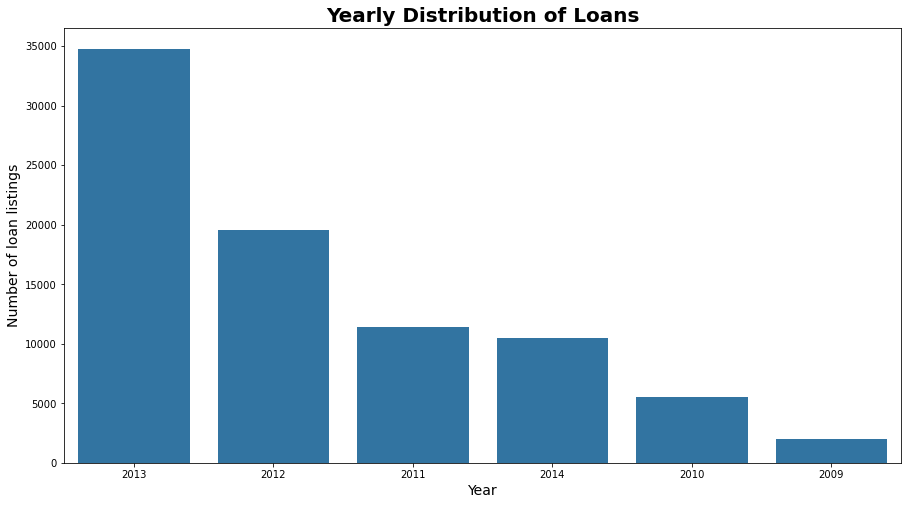

In [73]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'Year', color = default_color, ax = ax, order = df_clean.Year.value_counts().index)
plt.title('Yearly Distribution of Loans', fontsize = 20, weight = 'bold')
plt.ylabel('Number of loan listings', fontsize = 14)
plt.xlabel('Year', fontsize = 14);

> The number of listings has been increasing since July 2009 to 2013. A sharp decline was experienced in 2014 and no information is available to explain this fall.

## How is BORROWER APR distributed?

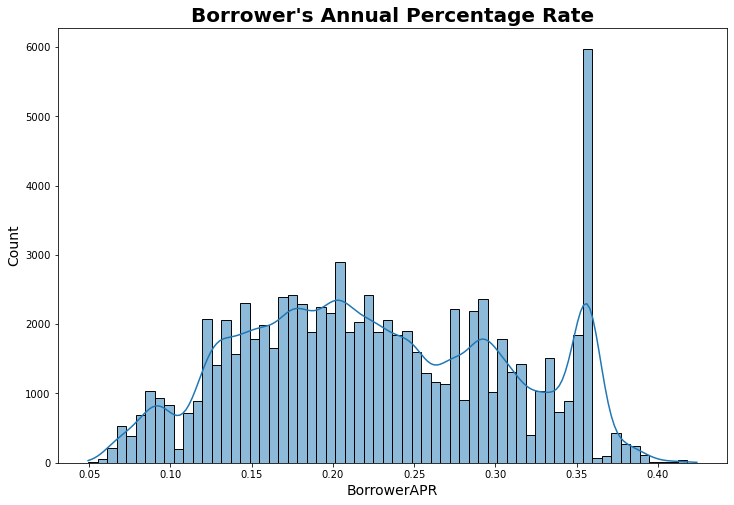

In [74]:
plt.figure(figsize=(12,8));
sns.histplot(df_clean.BorrowerAPR, kde=True);
plt.title("Borrower's Annual Percentage Rate", fontsize= 20, weight ='bold')
plt.xlabel('BorrowerAPR', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

> A multimodal distribution is noted from the above visualisations with significant peaks at approximately 0.09, 0.2, and 0.36 being the highest. A significantly low count of listings with a borrower apr of 0.4 and above is observed.

## How  are loan original amounts distributed?

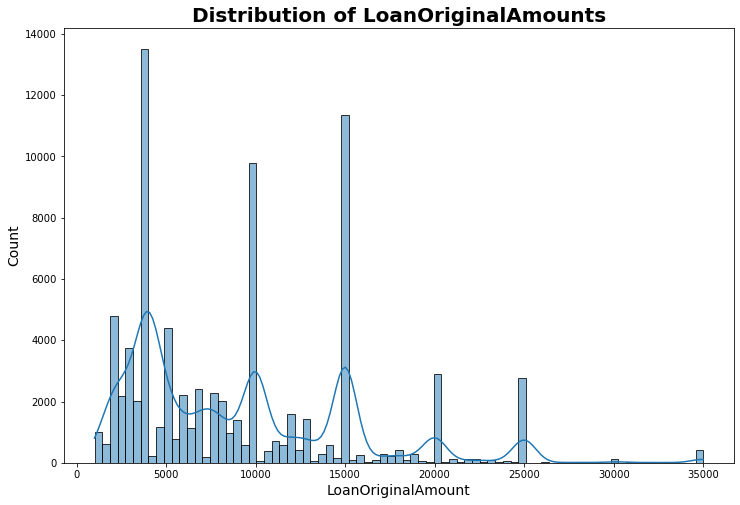

In [75]:
plt.figure(figsize=(12,8));
sns.histplot(df_clean.LoanOriginalAmount, kde=True);
plt.title("Distribution of LoanOriginalAmounts", fontsize= 20, weight = 'bold')
plt.xlabel('LoanOriginalAmount', fontsize = 14)
plt.ylabel('Count', fontsize=14);

> A multimodal distribution is observed with the highest peak at around 4000 followed by 15000, 10000, 20000 and 25000 respectively. Very few borrowers had loans greater than 25000.

## How is the BORROWER RATE distributed?

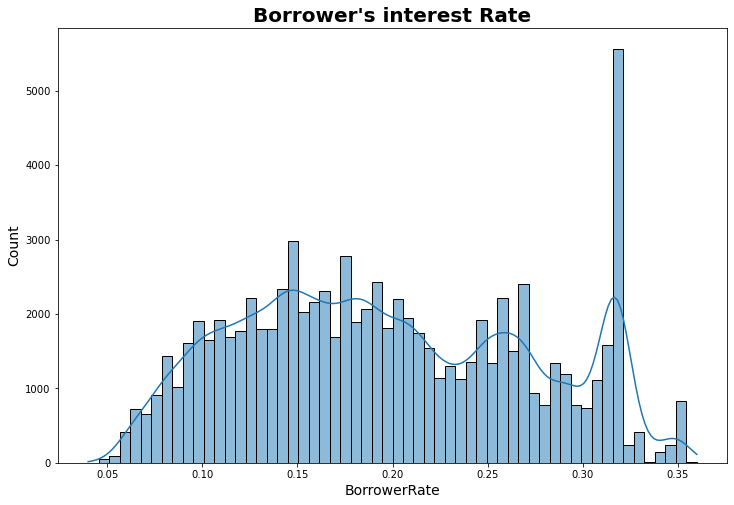

In [76]:
plt.figure(figsize=(12,8));
sns.histplot(df_clean.BorrowerRate, kde=True);
plt.title("Borrower's interest Rate", weight = 'bold', fontsize= 20)
plt.xlabel('BorrowerRate', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

> A multimodal distribution is noted from the above visualisations with significant peaks at approximately 0.15 and 0.32 being the highest.

### How is STATED MONTHLY INCOME distributed?

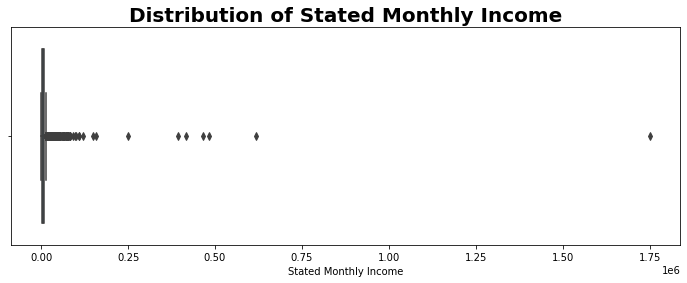

In [77]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='StatedMonthlyIncome', data=df_clean)
plt.title('Distribution of Stated Monthly Income', weight = 'bold', fontsize = 20)
plt.xlabel('Stated Monthly Income')
plt.show()

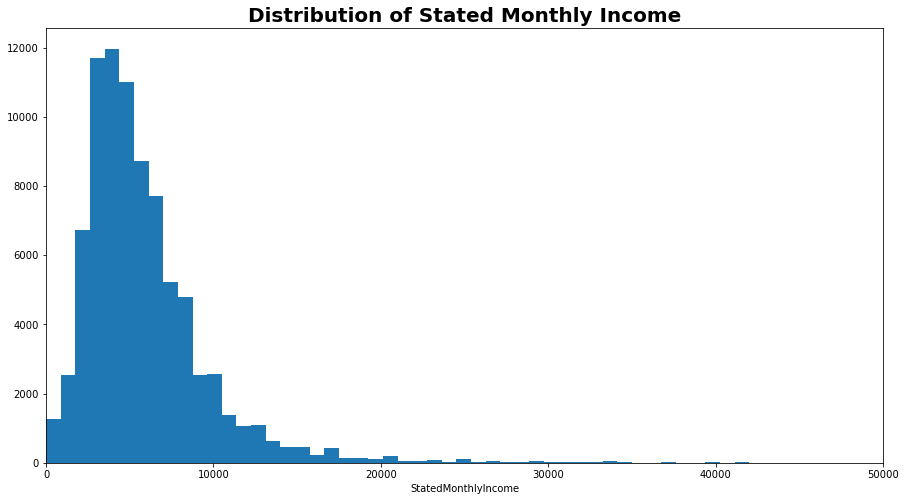

In [78]:
plt.figure(figsize=[15, 8])
plt.hist(data=df_clean,x="StatedMonthlyIncome", bins = 2000)
plt.xlim([0.0,50000])
plt.xlabel('StatedMonthlyIncome')
plt.title('Distribution of Stated Monthly Income', weight = 'bold', fontsize = 20)
plt.show()

The distribution of the dataset is strongly right skewed, suggesting the existance of quite a number of outliers

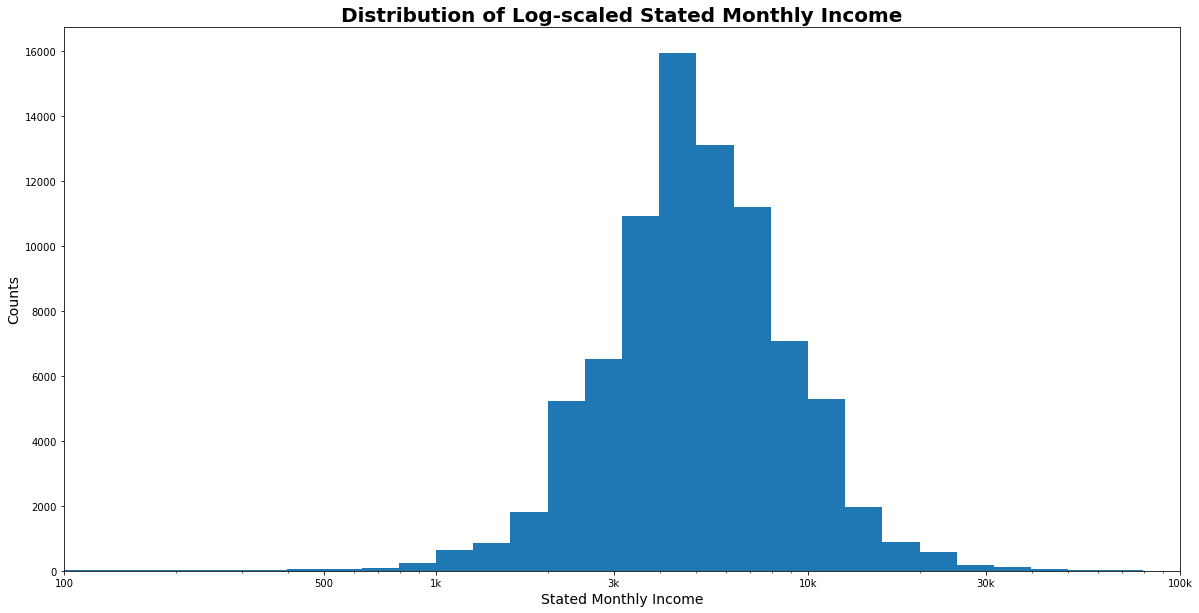

In [79]:
# A log-scaled visualization of the StatedMonthlyIncome distribution
plt.figure(figsize=[20,10])
sbins = 10**np.arange(0,6.24+0.1, 0.1)
plt.hist(data=df_clean, x='StatedMonthlyIncome', bins=sbins)
plt.ticklabel_format(style='plain')
plt.xscale('log')
ticks = [100, 500, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000]
labels= ['100', '500', '1k', '3k', '10k', '30k', '100k', '300k', '1m', '3m']
plt.xticks(ticks,labels)
plt.xlabel('Stated Monthly Income', fontsize =14)
plt.ylabel('Counts', fontsize =14)
plt.xlim(100, 100000)
plt.title("Distribution of Log-scaled Stated Monthly Income", weight = 'bold', fontsize = 20);

The distribution is still right skewed and more detailed. The highest peak is around 6k

## How is EMPLOYMENT STATUS distributed?

In [80]:
employ_order = df_clean.EmploymentStatus.value_counts().index

In [81]:
employ_count = df_clean.EmploymentStatus.value_counts()

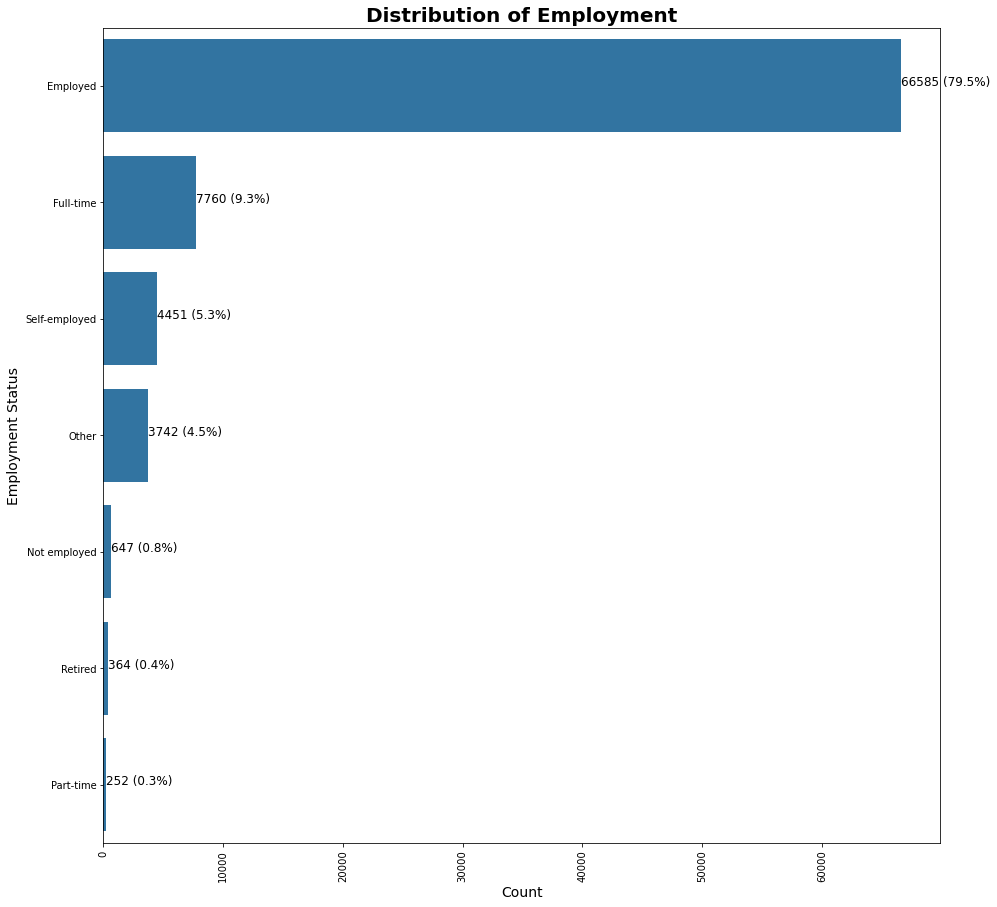

In [82]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[15, 15])
plt.xticks(rotation=90)
sns.countplot(data = df_clean, y = 'EmploymentStatus', color = base_color,
             order = employ_order)
plt.ylabel('Employment Status', fontsize =14)
plt.xlabel('Count', fontsize =14)
plt.title('Distribution of Employment', weight = 'bold', fontsize = 20)

for i in range (employ_count.shape[0]):
   
    employcount = employ_count[i]
    pct_str = '{} ({:0.1f}%)'.format(employcount, 100*employcount/df_clean.shape[0])
    plt.text(employcount + 1, i, s=pct_str, va='baseline', rotation=360, fontsize='large')

> Majority of the borrowers fall under the employed group followed by the full-time group. However there is ambiguity between employed and full time which could suggest the same thing. 

## LOAN STATUS

In [83]:
loan_order = df_clean.LoanStatus.value_counts().index

In [84]:
loan_count = df_clean.LoanStatus.value_counts()

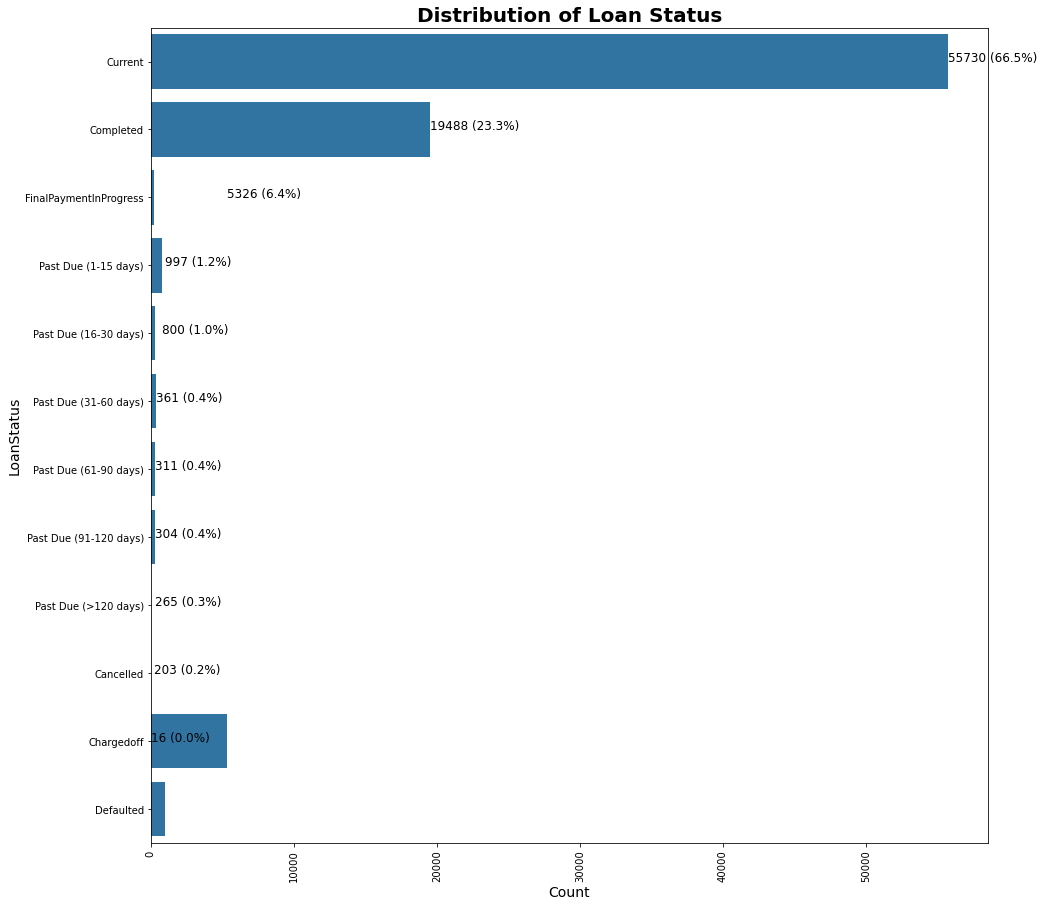

In [85]:
plt.figure(figsize=[15, 15])
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
sns.countplot(data = df_clean, y = 'LoanStatus', color = base_color,
             order = Status_Order)
plt.ylabel('LoanStatus', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.title('Distribution of Loan Status', fontsize = 20, weight = 'bold')


for i in range (loan_count.shape[0]):
    loancount = loan_count[i]
    pct_str = '{} ({:0.1f}%)'.format(loancount, 100*loancount/df_clean.shape[0])
    plt.text(loancount + 1, i, s=pct_str, va='baseline', rotation=360, fontsize='large');

> Majority of the loans are current and less than half of the current being completed ones.
Overdue loans range from 1 day and fall into 6 categories.

## OCCUPATION

In [86]:
occ_order = df_clean.Occupation.value_counts().index

In [87]:
occ_count = df_clean.Occupation.value_counts()

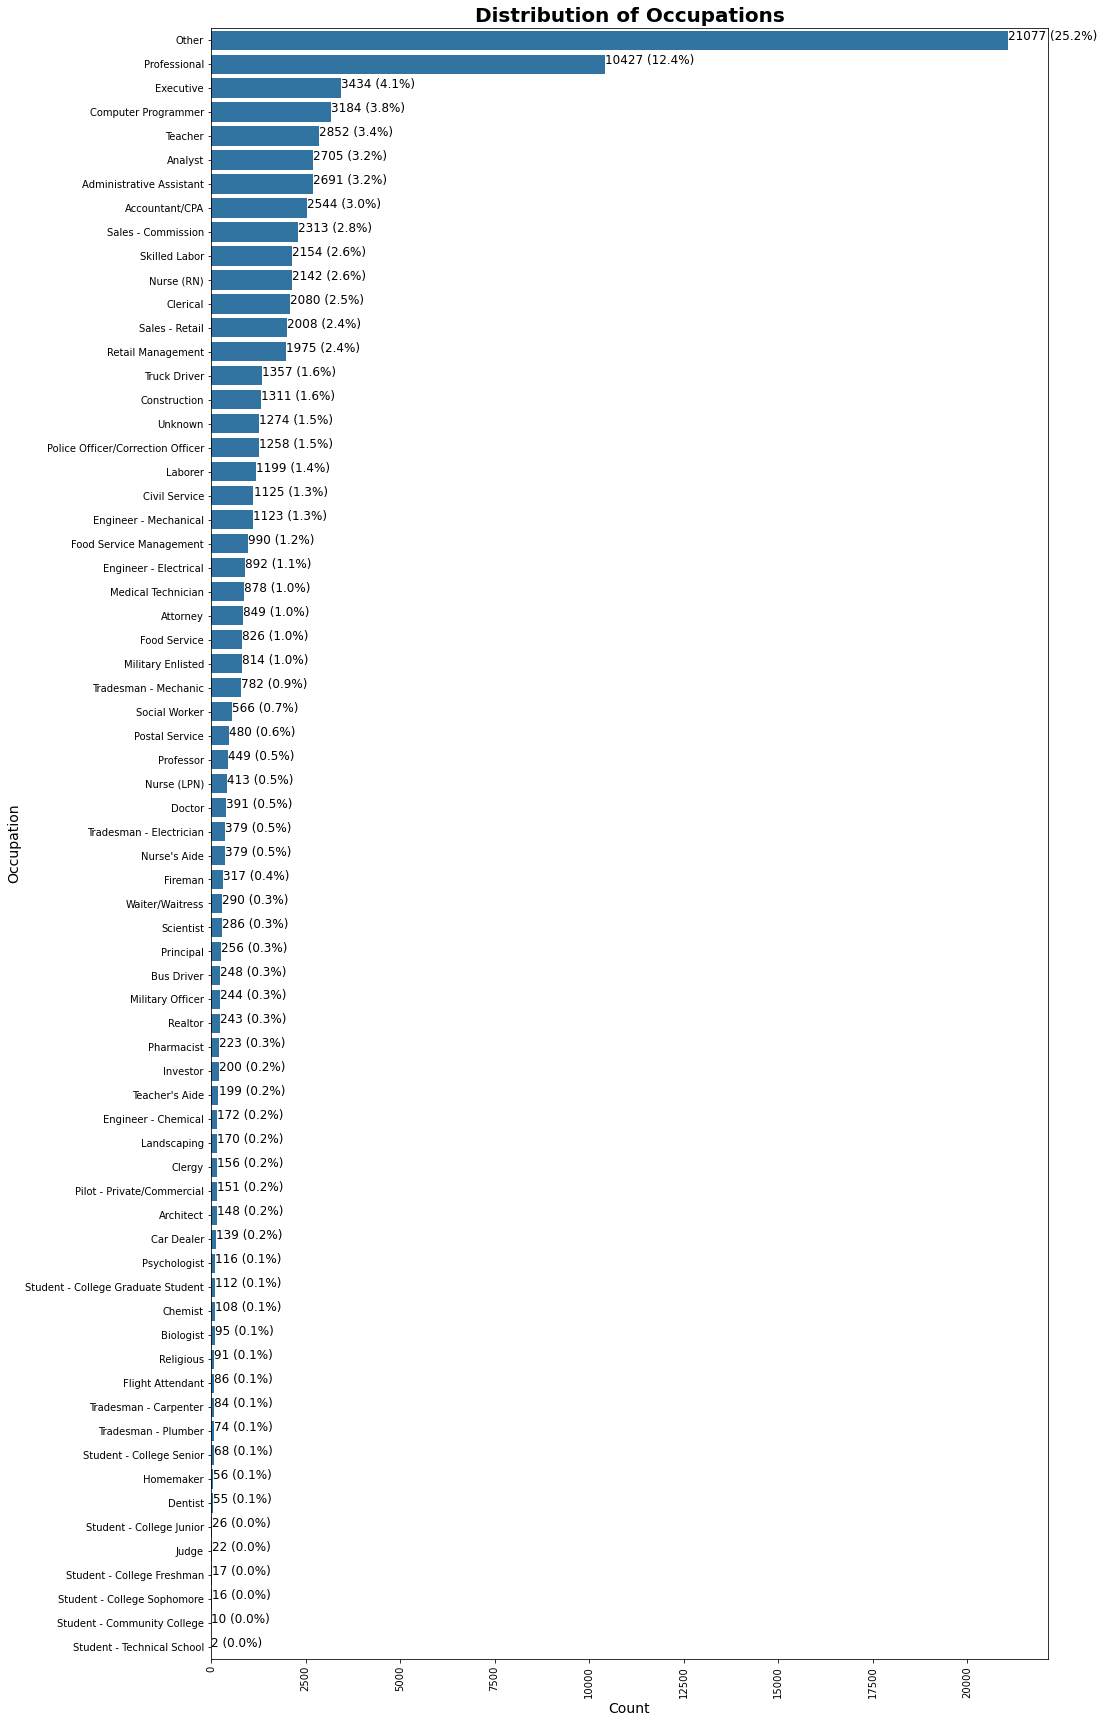

In [88]:
plt.figure(figsize=[15, 30])
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
sns.countplot(data = df_clean, y = 'Occupation', color = base_color,
             order = occ_order)
plt.ylabel('Occupation', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.title('Distribution of Occupations', fontsize = 20, weight = 'bold')

for i in range (occ_count.shape[0]):
    occupationcount = occ_count[i]
    pct_str = '{} ({:0.1f}%)'.format(occupationcount, 100*occupationcount/df_clean.shape[0])
    plt.text(occupationcount + 1, i, s=pct_str, va='baseline', rotation=360, fontsize='large');

## PROSPER RATING AND SCORES

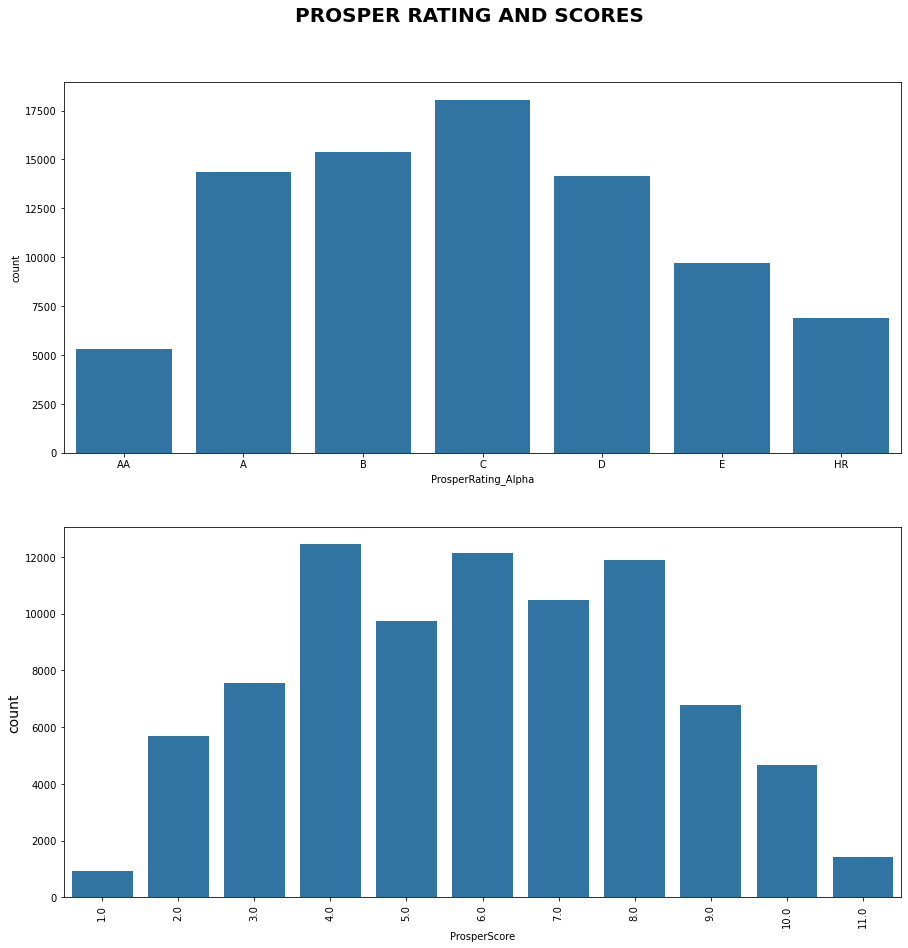

In [89]:
fig, ax = plt.subplots(nrows=2, figsize = [15,15])
default_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'ProsperRating_Alpha', color = default_color, 
              ax = ax[0], order = Prosper_order)

plt.ylabel('Count', fontsize = 14)
sns.countplot(data = df_clean, x = 'ProsperScore', color = default_color, ax = ax[1])
plt.xticks(rotation=90)
plt.suptitle('PROSPER RATING AND SCORES',  y=(0.95), weight ='bold', fontsize =20)
plt.show();

> C-rating has the highest total amonst the 7 rating categories.
A prosperscore of 4.0 has the highest frequecy followed by 6 and 8 respectively.

## BORROWER STATE

In [90]:
BorrowerState_count=df_clean["BorrowerState"].value_counts()

In [91]:
BorrowerState_sum=df_clean["BorrowerState"].value_counts().sum()

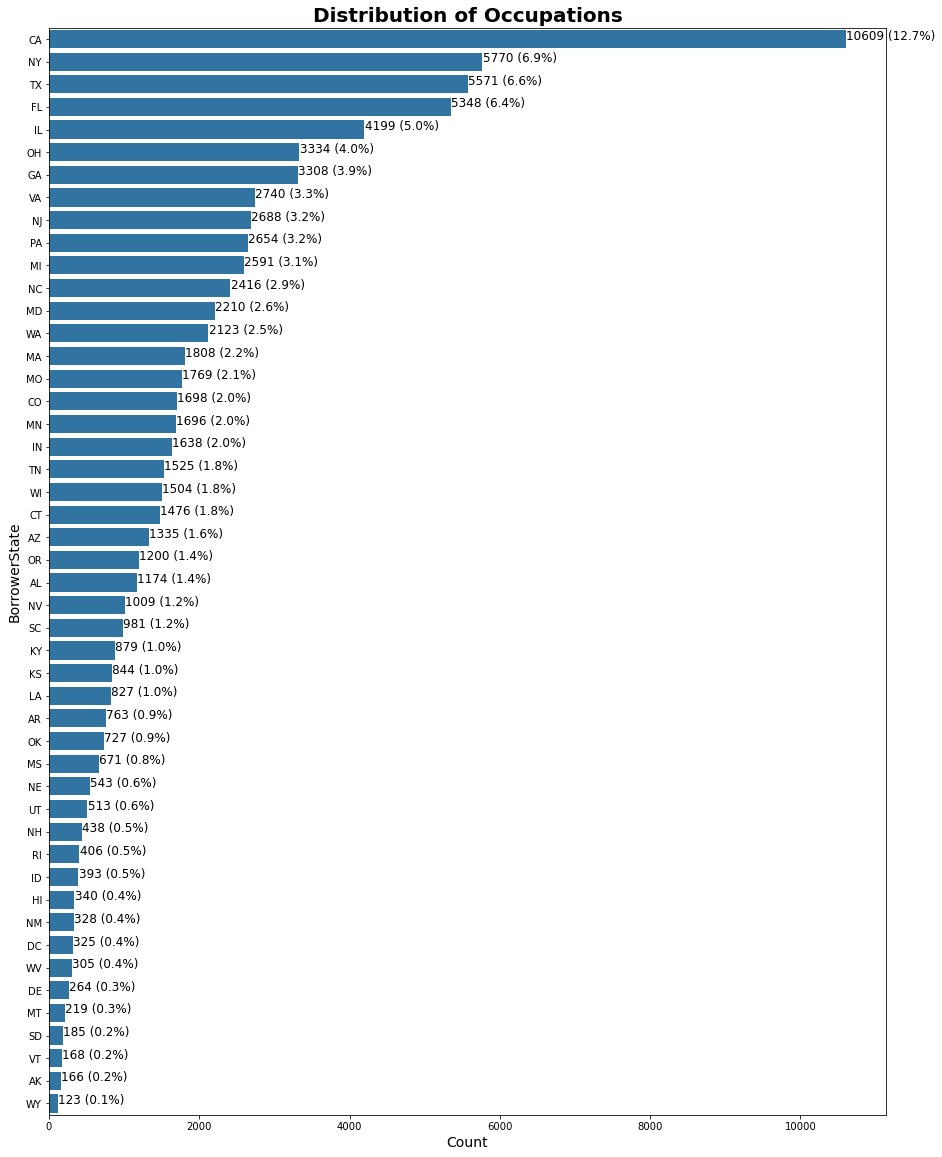

In [92]:
plt.figure(figsize=[15, 20])
base_color=sns.color_palette()[0]
BorrowerState_order=df_clean["BorrowerState"].value_counts().index
sns.countplot(data = df_clean, y = 'BorrowerState',color=base_color,order=BorrowerState_order)
plt.ylabel('BorrowerState', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.title('Distribution of Occupations', fontsize = 20, weight = 'bold')

for i in range (BorrowerState_count.shape[0]):
    statecount = BorrowerState_count[i]
    pct_str = '{} ({:0.1f}%)'.format(statecount, 100*statecount/df_clean.shape[0])
    plt.text(statecount + 1, i, s=pct_str, va='baseline', rotation=360, fontsize='large');

> Most loan listings come from individuals from CA

## What is the Termly distribution of loans?

In [93]:
term_count =df_clean.Term.value_counts()
term_sum = df_clean.Term.value_counts().sum()

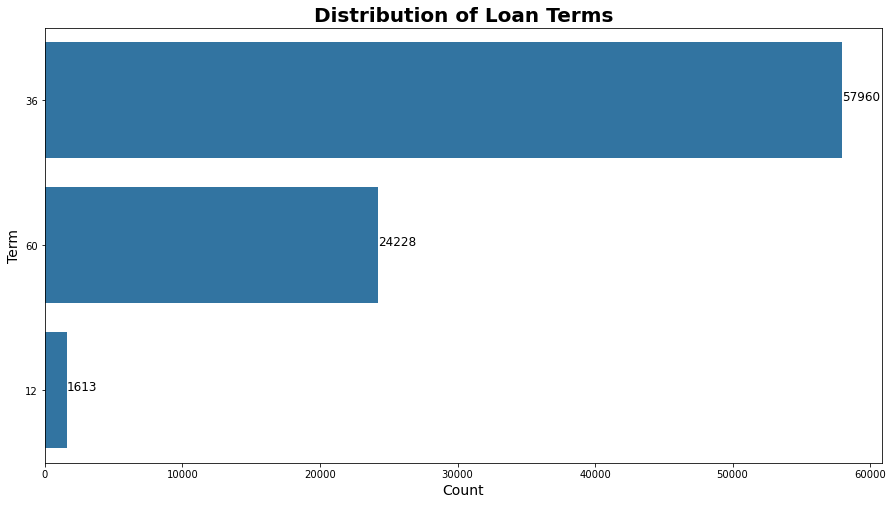

In [94]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df_clean, y = 'Term', color = default_color, ax = ax, order = df_clean.Term.value_counts().index)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Term', fontsize = 14)
plt.title('Distribution of Loan Terms', fontsize = 20, weight = 'bold');

locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
        termcount = df_clean.Term.value_counts()[int(label.get_text())]
        pct_str = '{}'.format(termcount)
        plt.text(y=loc, x=termcount, s=pct_str, va='baseline', rotation=360, fontsize='large')

> The Term with the highest number of loan listings is 36 months followed by 60 months and lastly 12 months. 

## What was the most common reason for taking a loan ?

In [95]:
ListingCategory_count=df_clean["ListingCategory"].value_counts()

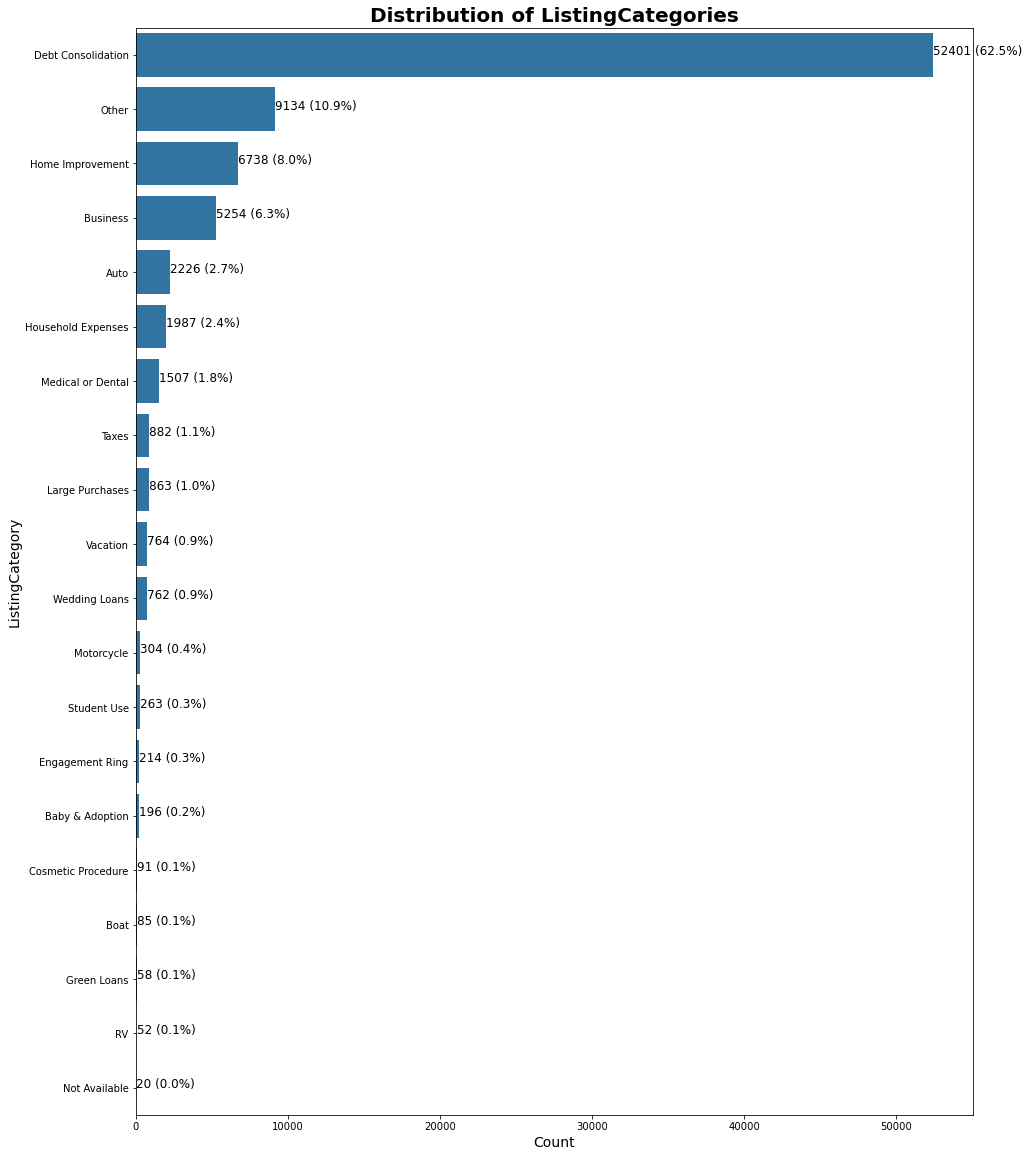

In [96]:
plt.figure(figsize=[15, 20])
base_color=sns.color_palette()[0]
ListingCategory_order=df_clean["ListingCategory"].value_counts().index
sns.countplot(data = df_clean, y = 'ListingCategory',color=base_color,order=ListingCategory_order)
plt.ylabel('ListingCategory', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.title('Distribution of ListingCategories', fontsize = 20, weight = 'bold');

for i in range (ListingCategory_count.shape[0]):
    ListingCategorycount = ListingCategory_count[i]
    pct_str = '{} ({:0.1f}%)'.format(ListingCategorycount, 100*ListingCategorycount/df_clean.shape[0])
    plt.text(ListingCategorycount + 1, i, s=pct_str, va='baseline', rotation=360, fontsize='large');

> Most loan applications are for Debt consolidation

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> log tranformations were performed on 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 

# BIVARIATE EXPLORATION

## How does Borrower's Employment status affect the Borrower Rate ?

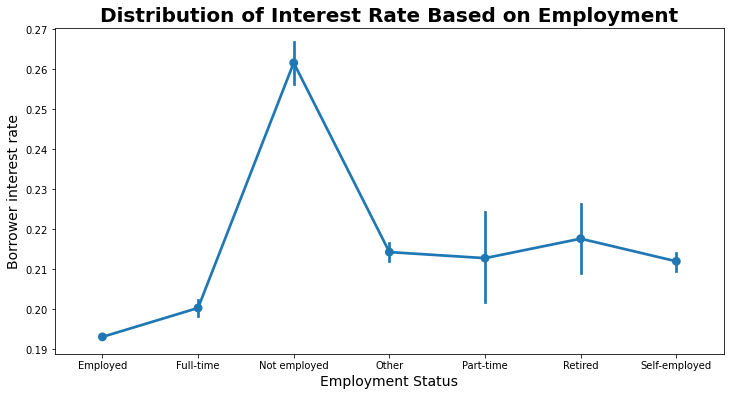

In [97]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='EmploymentStatus', data=df_clean)
plt.title('Distribution of Interest Rate Based on Employment', fontsize = 20, weight = 'bold')
plt.xlabel('Employment Status', fontsize = 14)
plt.ylabel('Borrower interest rate', fontsize = 14)
plt.show()

> A clear relationship can be observed between Employment Status and Loan Interest Rate. Borrower's who are Not Employed, have been charged the Highest Interest Rate, where borrowers who are Employed Full-Time/Part-Time are offered the minimum Interest Rate.

## BorrowerAPR vs BorrowerRate

<Figure size 864x864 with 0 Axes>

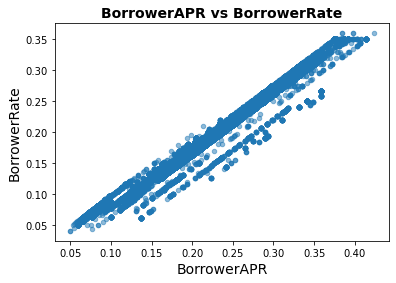

In [98]:
fig = plt.figure(figsize=(12, 12))
df_clean.plot.scatter(x = 'BorrowerAPR', y = 'BorrowerRate', alpha = 0.5)
plt.title('BorrowerAPR vs BorrowerRate', fontsize = 14, weight = 'bold')
plt.xlabel('BorrowerAPR', fontsize = 14)
plt.ylabel('BorrowerRate', fontsize = 14)
plt.show();

> Strong correlation between the subject variables is observed

### What is the relationship between Term and BorrowAPR?

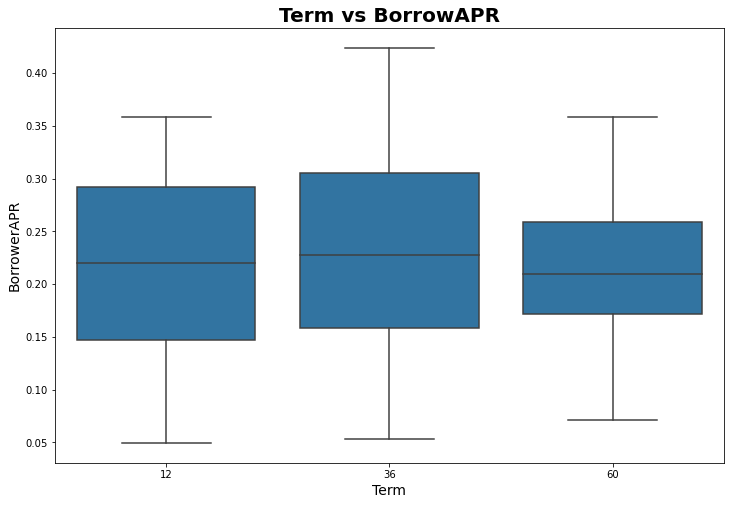

In [99]:
plt.figure(figsize=[12,8])
sns.boxplot(data = df_clean, y = 'BorrowerAPR', x = 'Term', color = base_color)
plt.title('Term vs BorrowAPR', fontsize = 20, weight = 'bold')
plt.ylabel('BorrowerAPR', fontsize = 14)
plt.xlabel('Term', fontsize = 14)
plt.show();

### What is the relationship between Term and BorrowRate?

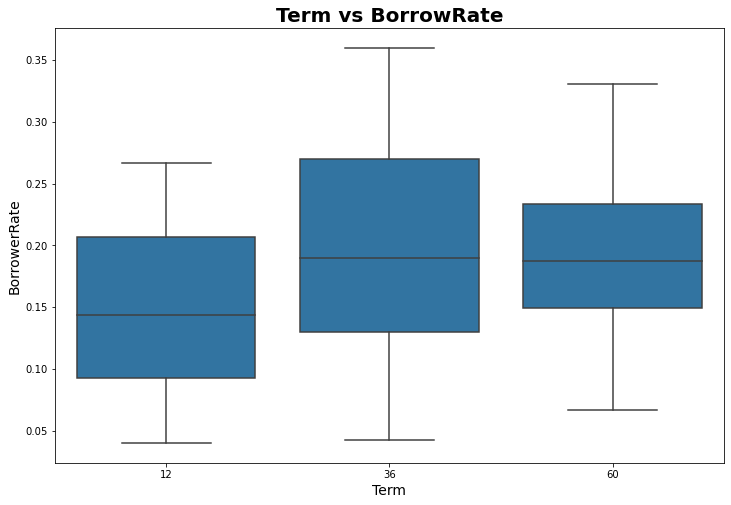

In [100]:
plt.figure(figsize=[12,8])
sns.boxplot(data = df_clean, y = 'BorrowerRate', x = 'Term', color = base_color)
plt.title('Term vs BorrowRate', fontsize = 20, weight = 'bold')
plt.ylabel('BorrowerRate', fontsize = 14)
plt.xlabel('Term', fontsize = 14)
plt.show();

> From the above plot, its important to note that loans based on 36 months term have the highest Borrower APR AND Borrower rates ranges.

### What is the relationship between employment status and term?

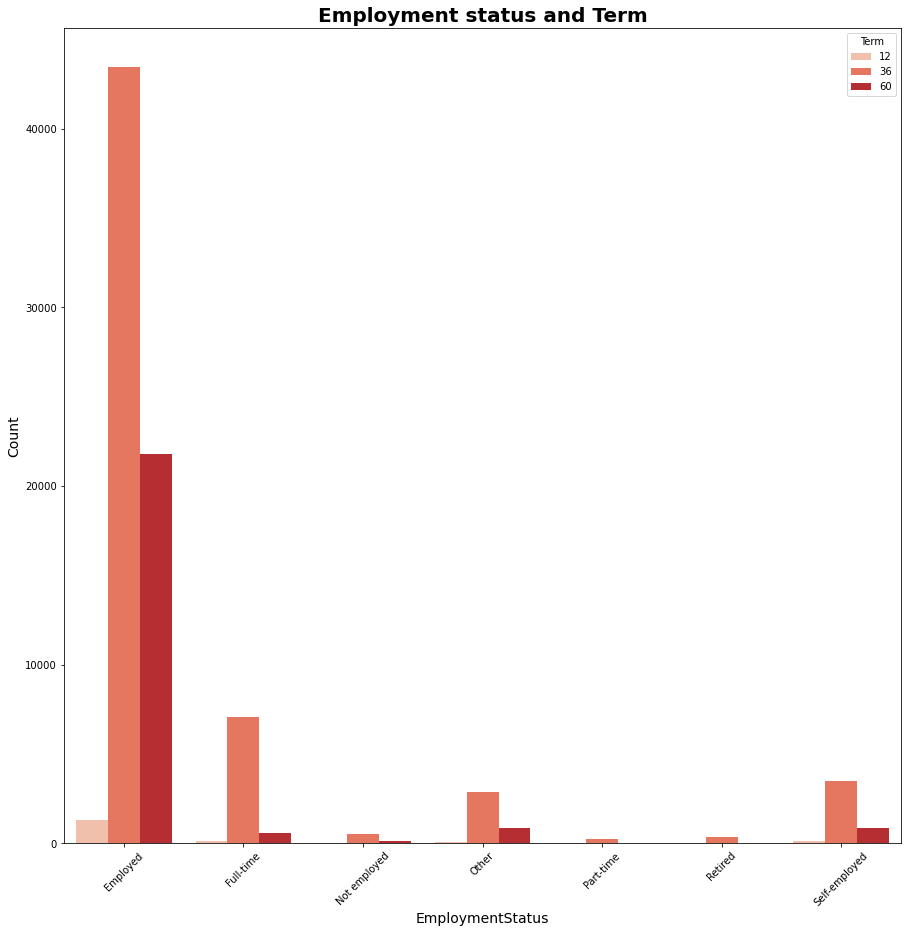

In [101]:
plt.figure(figsize = [15, 15])
sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
plt.xticks(rotation = 45)
plt.title('Employment status and Term', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('EmploymentStatus', fontsize = 14)
plt.show();

> Employed and full time borrowers have the highest count on loans based on 36 months and 60 months loan terms.

### Prosper rating vs term

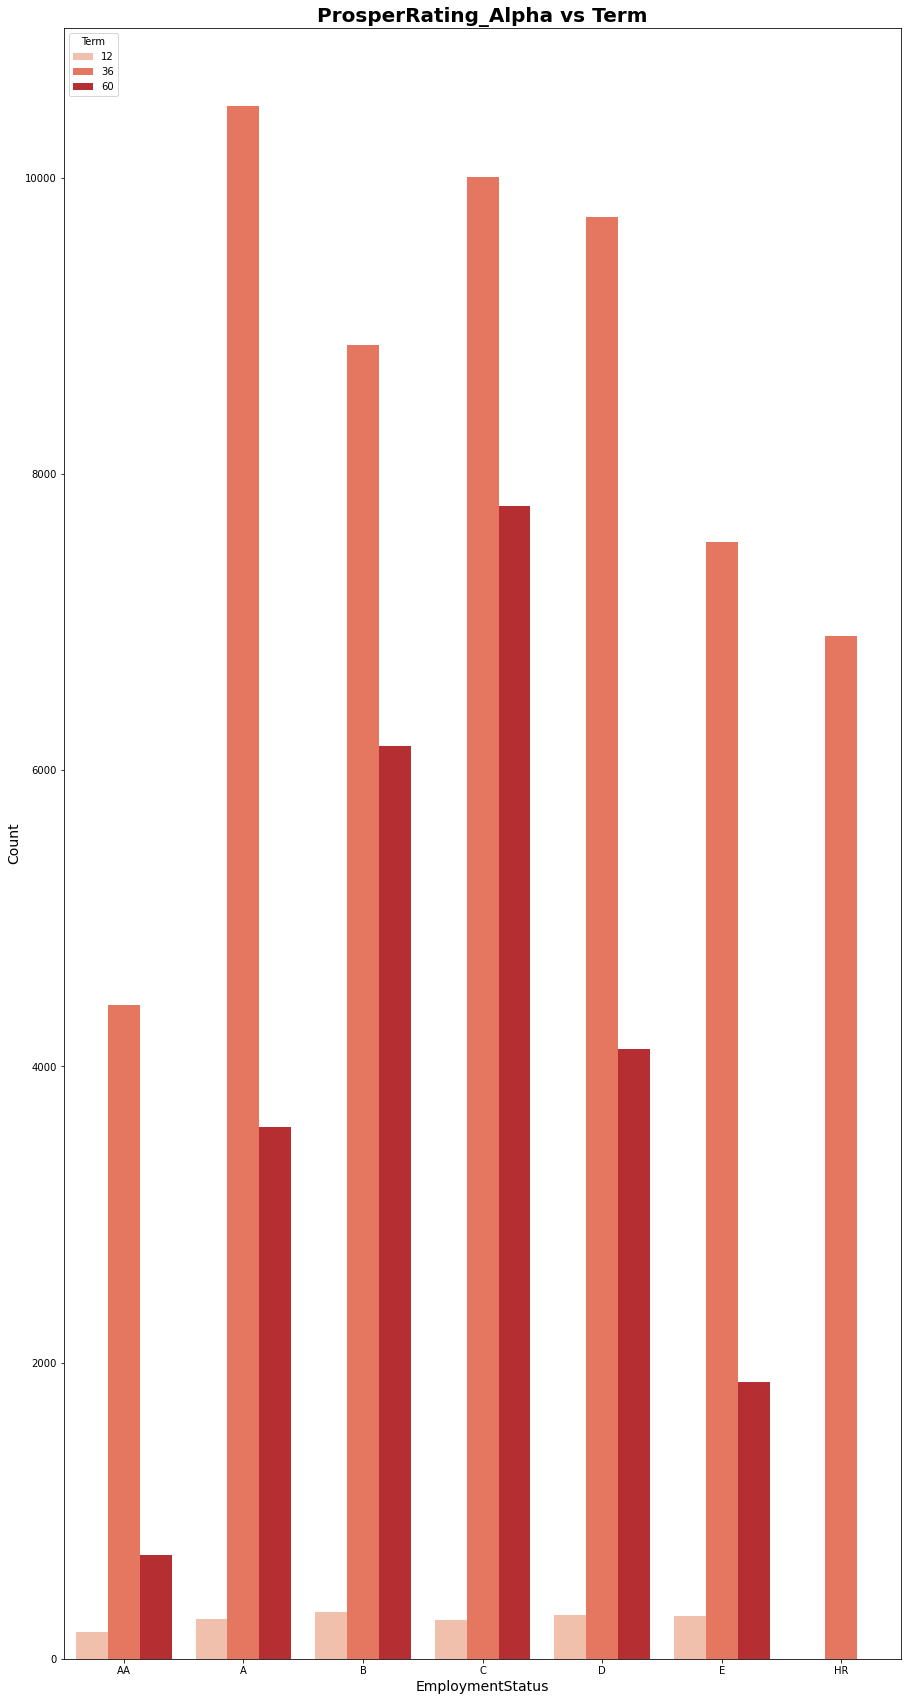

In [102]:
plt.figure(figsize = [15, 30])
sns.countplot(data = df_clean, x = 'ProsperRating_Alpha', hue = 'Term', palette = 'Reds', order = Prosper_order)
plt.title('ProsperRating_Alpha vs Term', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('EmploymentStatus', fontsize = 14)
plt.show();

> 36 months is the most observed term amongst the ratings with loans that have the highest rating recording low counts in that category.

### Prosper rating vs. employment status

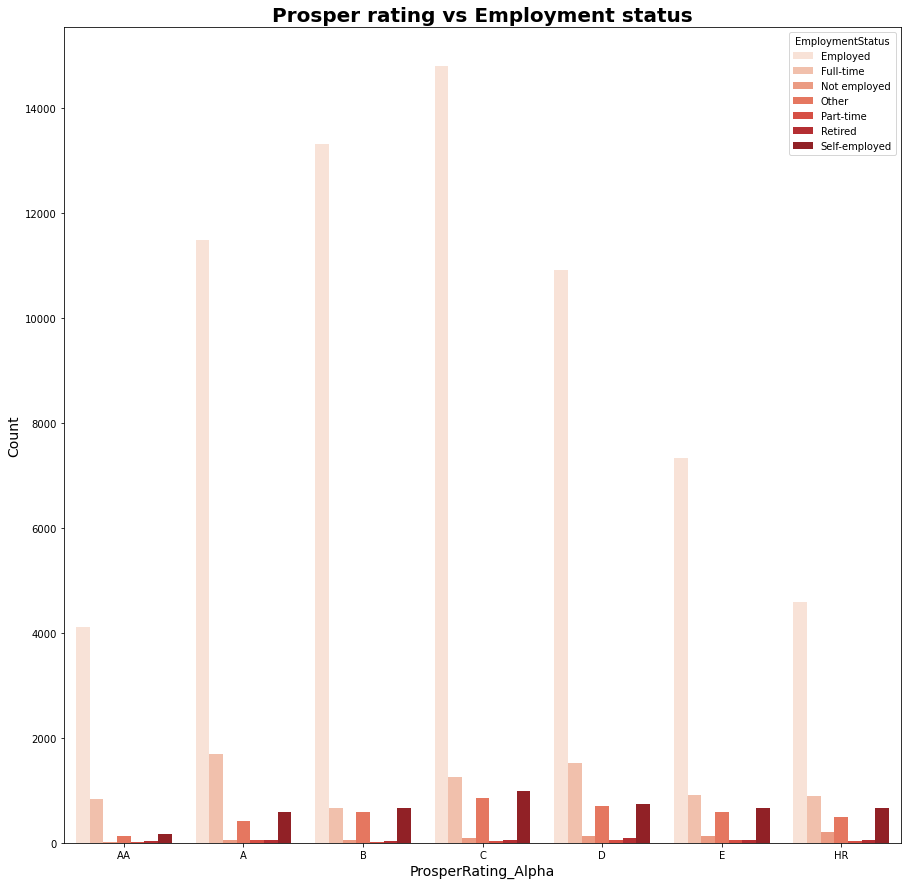

In [103]:
plt.figure(figsize = [15, 15])
sns.countplot(data = df_clean, hue = 'EmploymentStatus', x = 'ProsperRating_Alpha', palette = 'Reds', order = Prosper_order);
plt.title('Prosper rating vs Employment status', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('ProsperRating_Alpha', fontsize = 14)
plt.show();

> The employed borrowers with C-rating have the highest count in overall. 

### Loan status vs ProsperRating_alpha

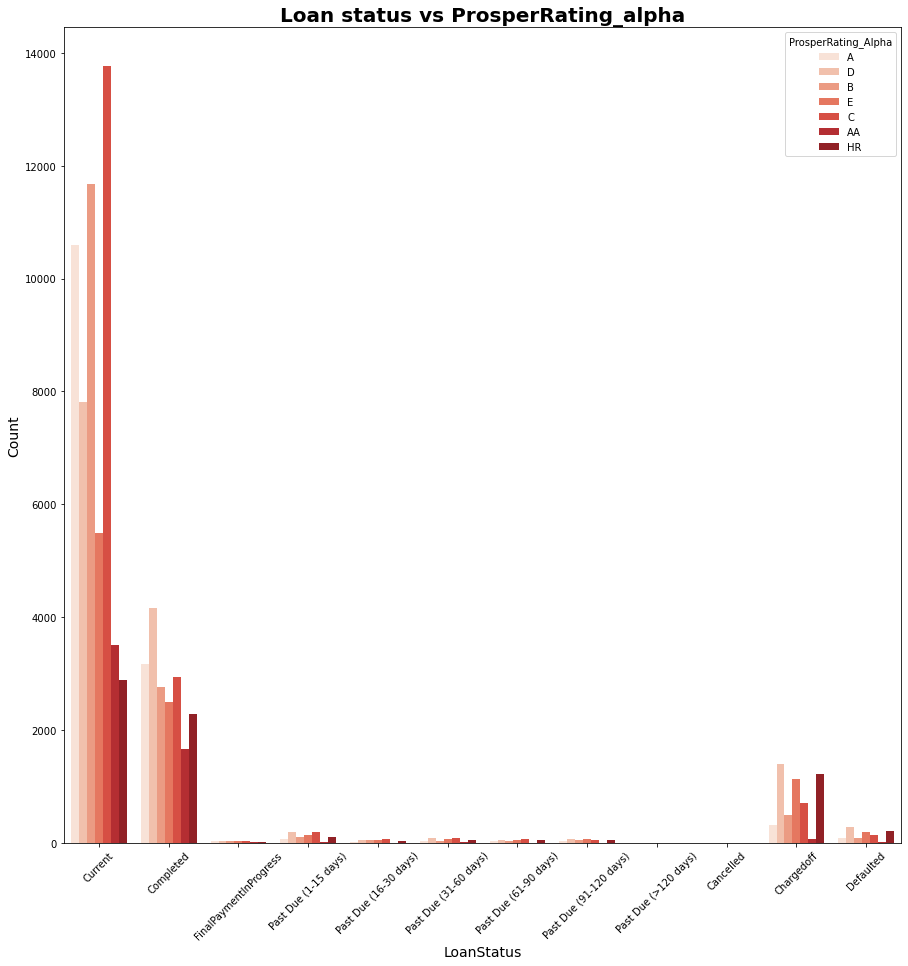

In [104]:
plt.figure(figsize = [15, 15])
sns.countplot(data = df_clean, x = 'LoanStatus', hue = 'ProsperRating_Alpha', palette = 'Reds', order = Status_Order)
plt.xticks(rotation = 45)
plt.title('Loan status vs ProsperRating_alpha', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('LoanStatus', fontsize = 14)
plt.show();

> Prosper rating D is the most frequent rating among defaulted credits.
Prosper rating C is the most frequent rating among current credits for the employed dataset.

### How does ocupation relate to term?

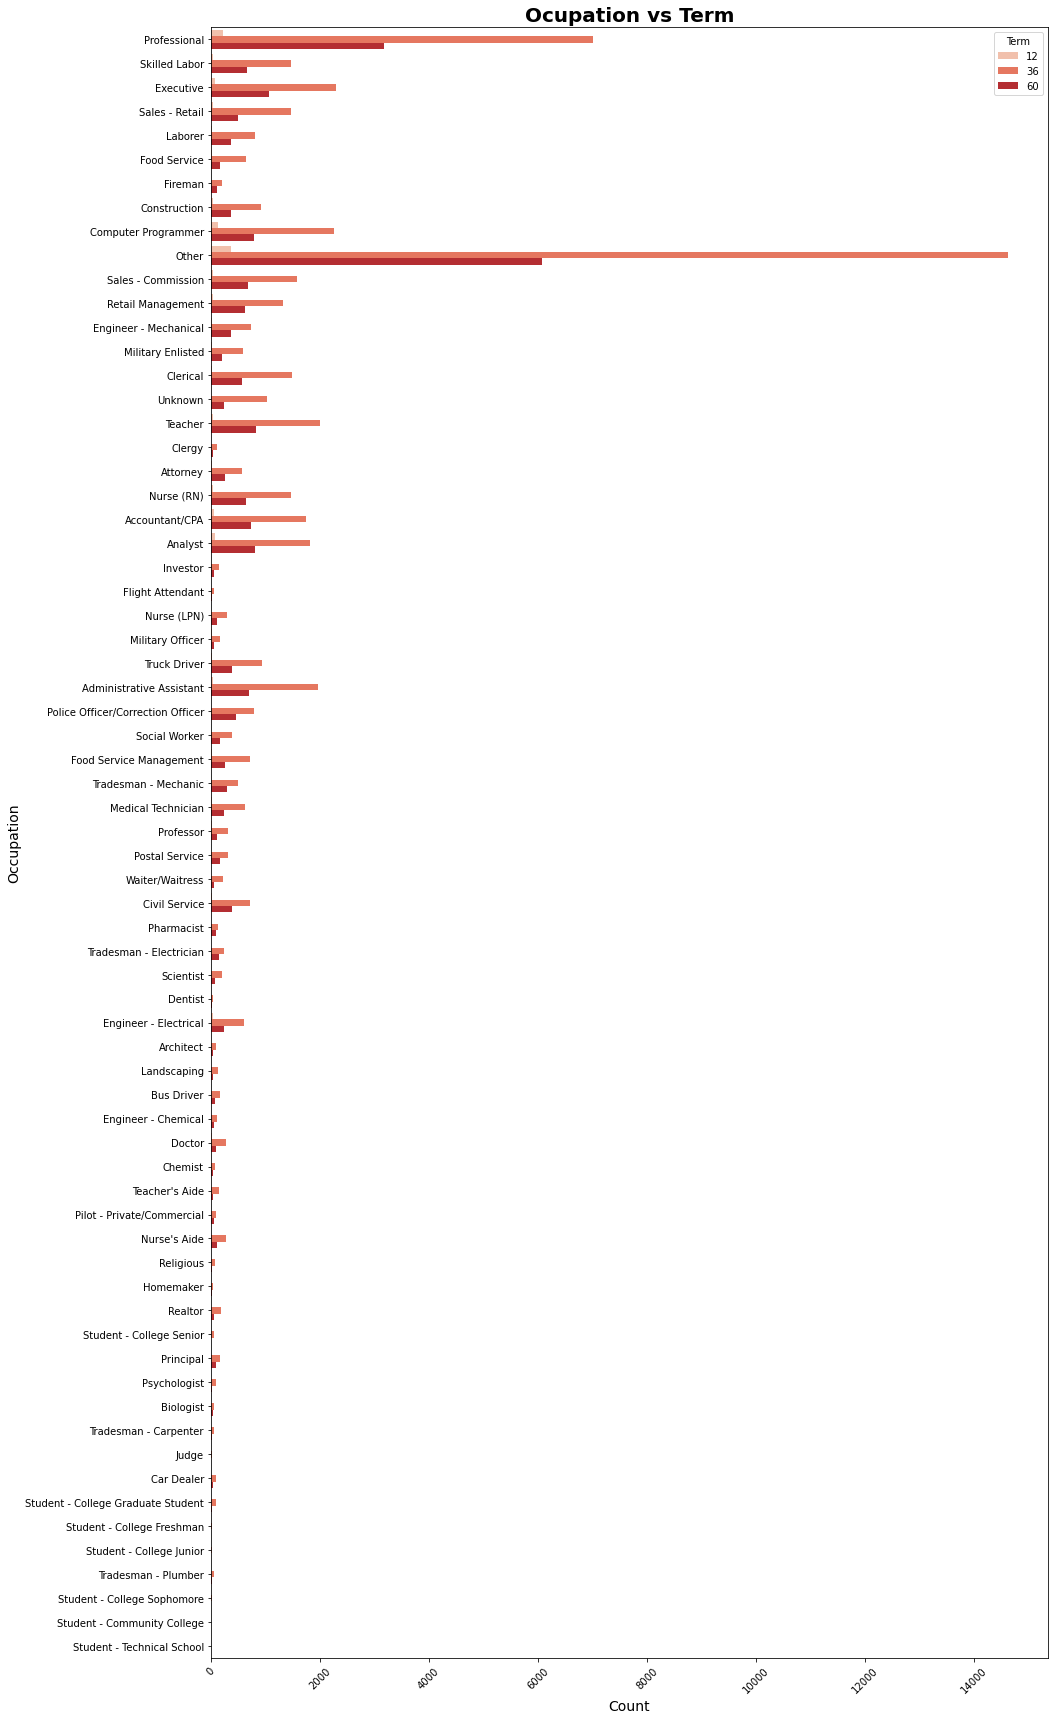

In [105]:
plt.figure(figsize = [15,30])
sns.countplot(data = df_clean, y = 'Occupation', hue = 'Term', palette = 'Reds');
plt.xticks(rotation=45)
plt.title('Ocupation vs Term', fontsize = 20, weight = 'bold')
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Occupation', fontsize = 14)
plt.show();

> Most occupations fall under the 36 month term.

### How does ListingCategory vary with Term?

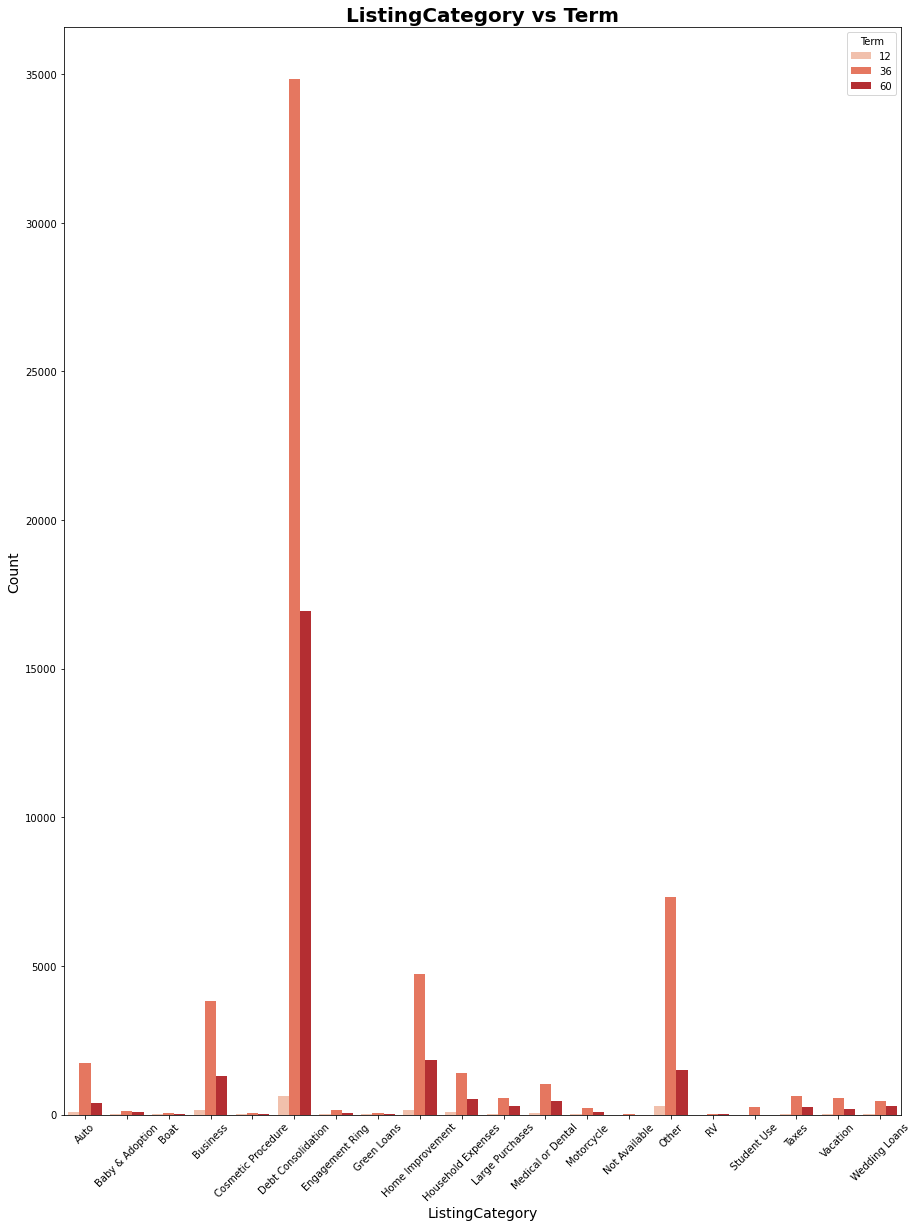

In [106]:
plt.figure(figsize = [15,20])
sns.countplot(data = df_clean, hue = 'Term', x = 'ListingCategory', palette = 'Reds')
plt.xticks(rotation=45)
plt.title('ListingCategory vs Term', fontsize = 20, weight = 'bold')
plt.xlabel('ListingCategory', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show();

> Debt consolidation under the 36 and 60 months terms has the highest frequency.

### Does Higher Income Lead to Higher Prosper Scores ?

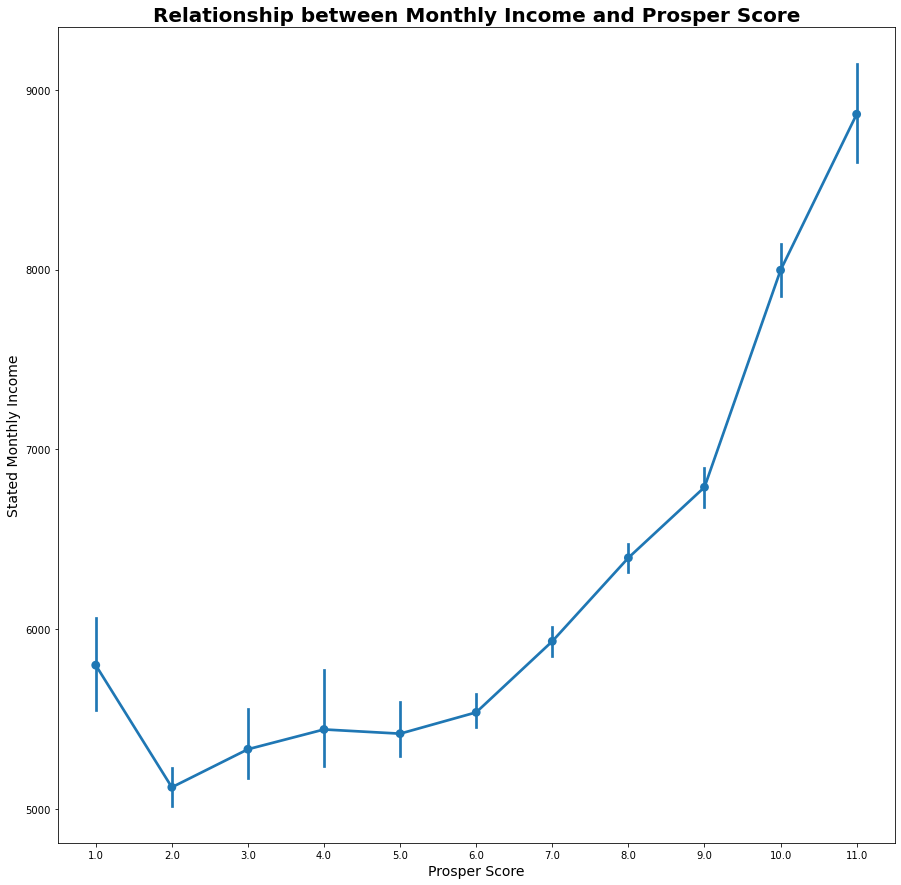

In [107]:
fig = plt.figure(figsize=(15, 15))
sns.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=df_clean)
plt.title('Relationship between Monthly Income and Prosper Score', weight = 'bold', fontsize =20)
plt.xlabel('Prosper Score', fontsize = 14)
plt.ylabel('Stated Monthly Income', fontsize = 14)
plt.show();

> It can be observed that there is a Positive Correlation between Monthly Income and Prosper Score statring from score 2 and strengthens sharply from score 6. Higher the Monthly Income, Higher the Prosper Score.

## LoanStatus vs ProsperRating_Alpha

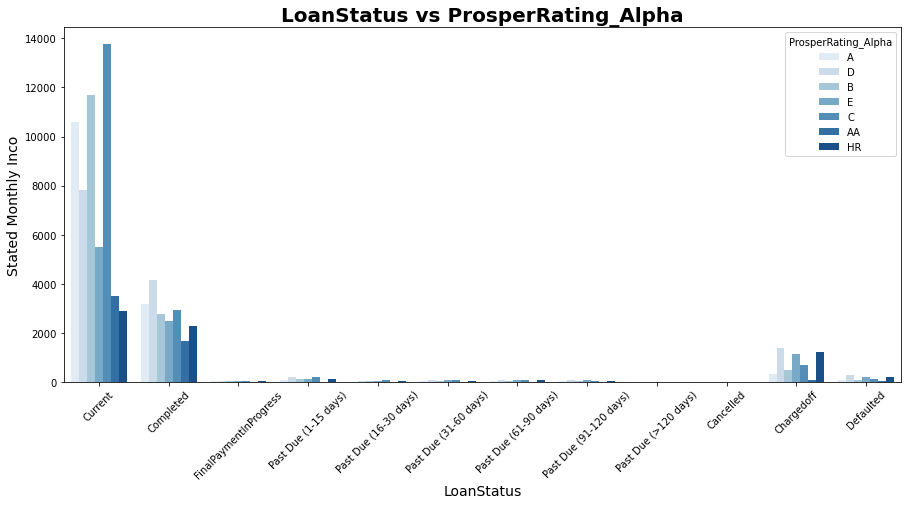

In [108]:
plt.figure(figsize = [15, 30])
plt.subplot(4, 1, 1)
sns.countplot(data = df_clean, x = 'LoanStatus', hue = 'ProsperRating_Alpha', palette = 'Blues', order = Status_Order)
plt.xticks(rotation=45);
plt.title('LoanStatus vs ProsperRating_Alpha', weight = 'bold', fontsize =20)
plt.xlabel('LoanStatus', fontsize = 14)
plt.ylabel('Stated Monthly Inco', fontsize = 14)
plt.show();

> Prosper rating C is the most frequent rating among current credits  followed by B-rating and A-rating respectively.

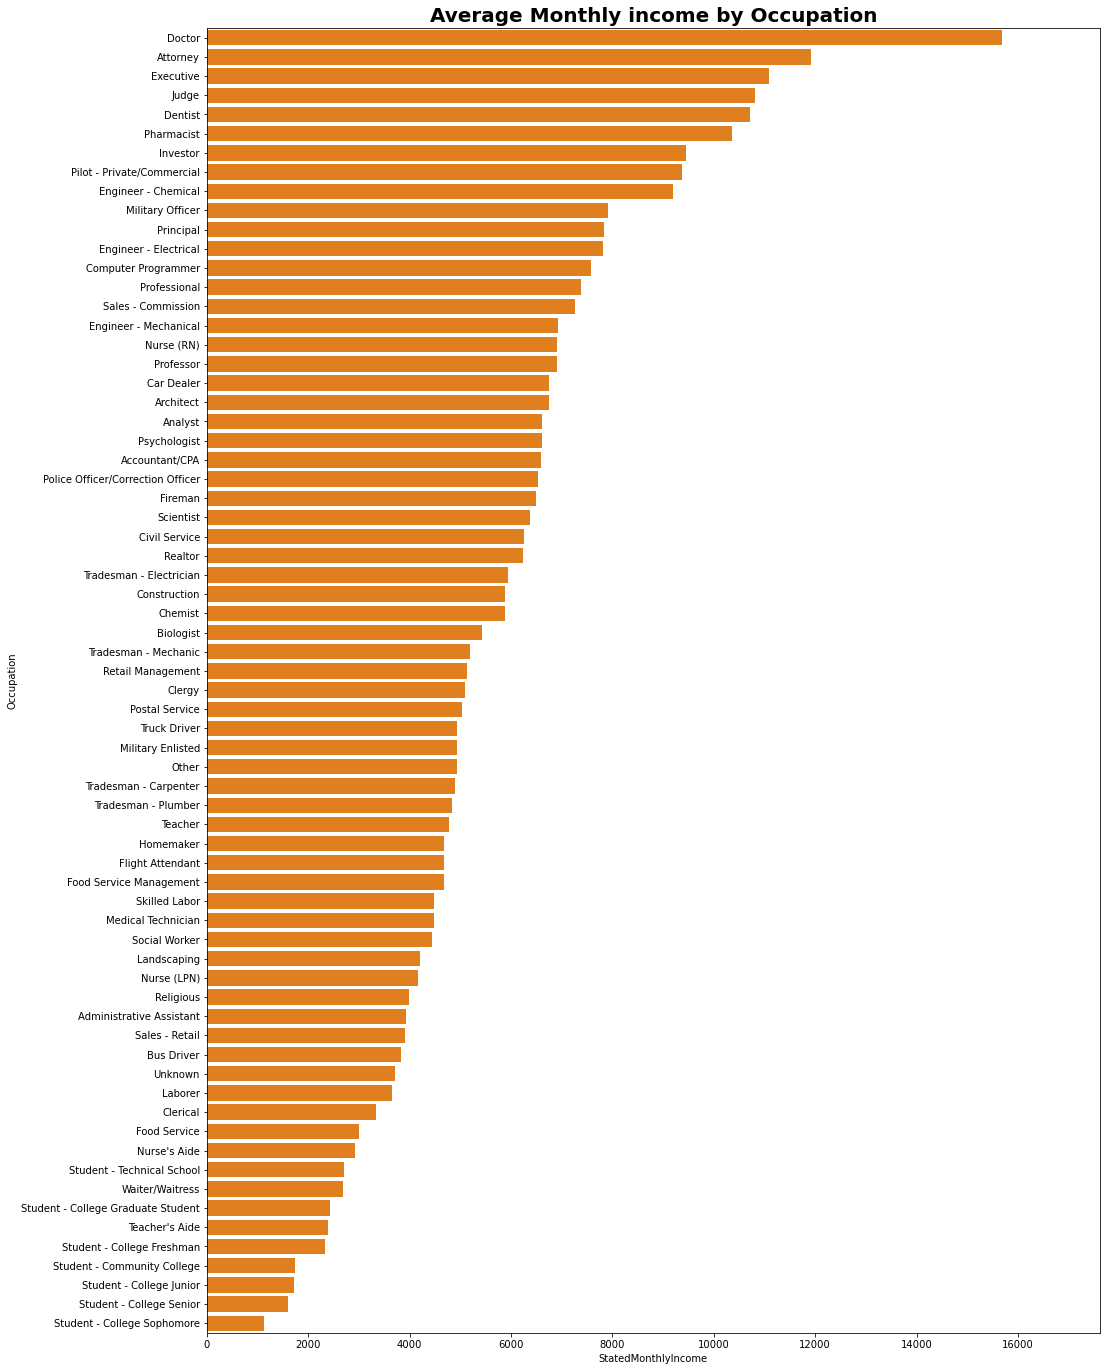

In [109]:
Occupation = df_clean.groupby('Occupation')['StatedMonthlyIncome'].mean()
Occupation = Occupation.sort_values(ascending = False).index
plt.figure(figsize = [16, 24])
base_color = sns.color_palette("Paired")[7]
sns.barplot(data = df_clean, y = 'Occupation', x = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order= Occupation)
plt.ylabel("Occupation")
plt.title("Average Monthly income by Occupation", fontsize = 20, weight = 'bold')
plt.xticks(rotation = 0);

> Top 5 earning occupation on a monthly basis are : doctor, attorney, executive, judge and dentist

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Prosper rating D is the most frequent rating among defaulted credits. Prosper rating C is the most frequent rating among current credits for the employed dataset.The employed borrowers with C-rating have the highest count in overall.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A positive correlation of prosper scores and state monthly income is observed to be starting when the score is 2 and later strengthens at 6. Between score 1 and 2, the correlation is negative which does make sense.

# MULTIVARIATE EXPLORATION

At this point I would like to know to what extent the loan status is influenced by borrower rates and prosper ratings

### How does BorrowerAPR relate to BorrowerRate on a termly basis?

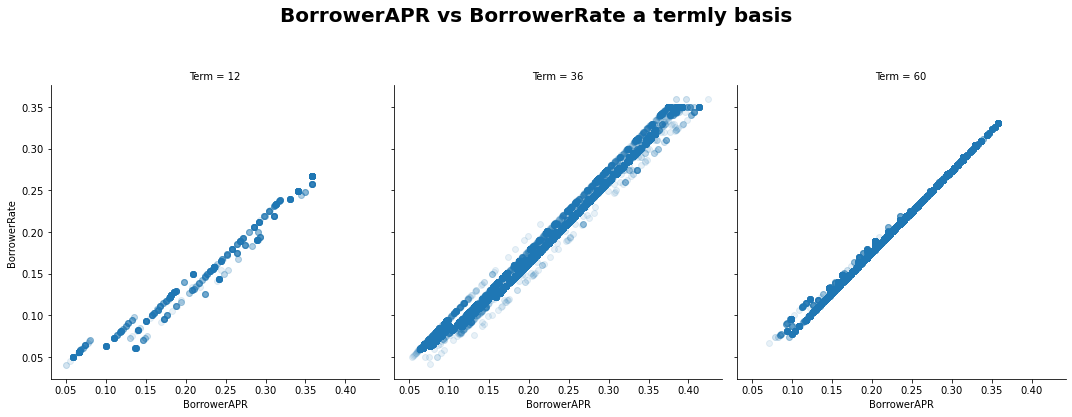

In [110]:
g = sns.FacetGrid(data = df_clean, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'BorrowerRate', alpha=0.1)
plt.suptitle('BorrowerAPR vs BorrowerRate a termly basis', y=(1.15), weight ='bold', fontsize =20)
plt.show();

> A positive correlation is observed for BorrowerRate and  BorrowerAPR for all Loan terms, 12, 36 and 60 months.

> The BorrowerRate and BorrowerAPR are more prevalent between 0.1 and 0.4 for 36 & 60 month term loans

### How does ProsperRating_Alpha relate to BorrowerRate on termly basis?

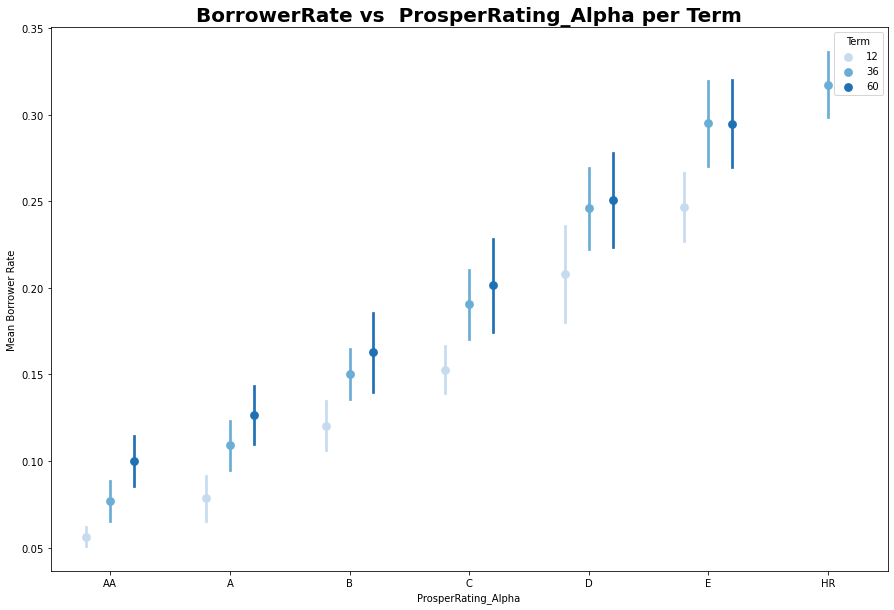

In [111]:
fig = plt.figure(figsize = [15,10])
ax = sns.pointplot(data = df_clean, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = Prosper_order)
plt.title('BorrowerRate vs  ProsperRating_Alpha per Term', fontsize = 20, weight = 'bold')
plt.ylabel('Mean Borrower Rate')
ax.set_yticklabels([],minor = True);

### How does EmploymentStatus relate to BorrowerRate on a termly basis?

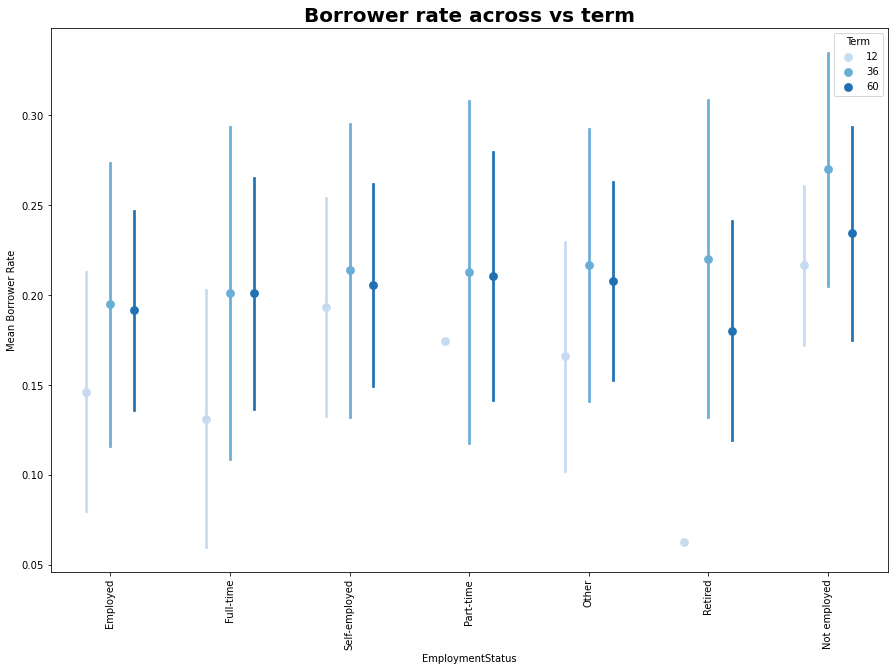

In [112]:
fig = plt.figure(figsize = [15,10])
ax = sns.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = Employment_order)
plt.title('Borrower rate across vs term', weight = 'bold', fontsize = 20)
plt.ylabel('Mean Borrower Rate')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

> The employed and full- time loan applicants on 12 months terms had relatively low interest rates. Not employed applicants had the highest interest rates in overall. The borrow rate on all 60 months term across board is slightly lower than the on 36 months.

### How does ProsperRating_Alpha relate to LoanOriginalAmount across varying LoanStatus categories?

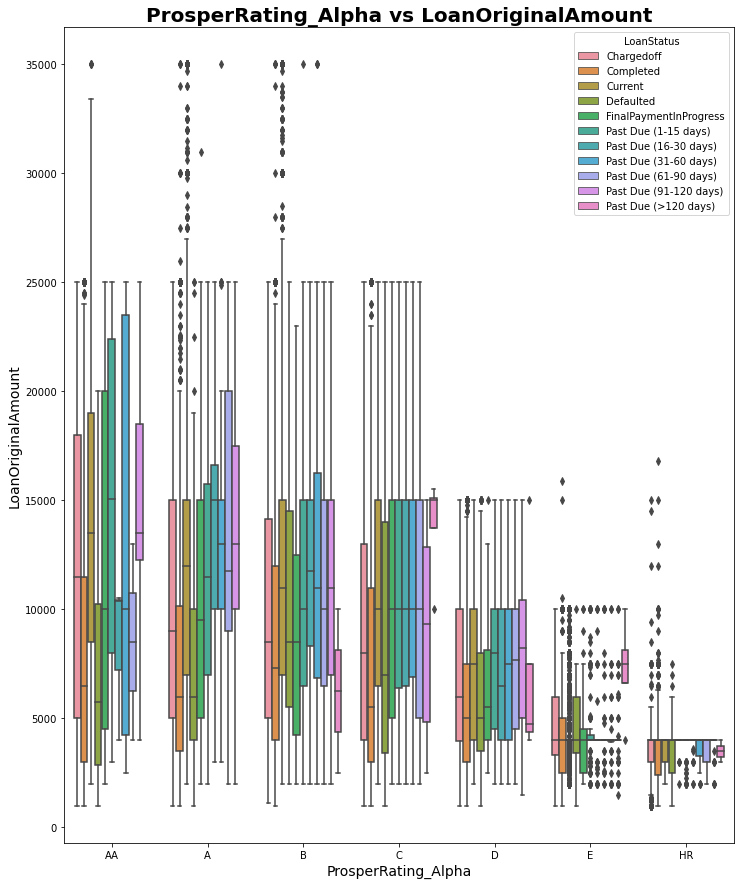

In [113]:
plt.figure(figsize = [12, 15])
sns.boxplot(data=df_clean, x='ProsperRating_Alpha', y='LoanOriginalAmount', hue='LoanStatus', order = Prosper_order)
plt.ylabel('LoanOriginalAmount', fontsize =14)
plt.xlabel('ProsperRating_Alpha', fontsize= 14)
plt.title('ProsperRating_Alpha vs LoanOriginalAmount', fontsize = 20, weight = 'bold');

> Most of the defaulted and overdue loans are observed to be coming from listings with lower prosper ratings. borrowers with higher ratings fall within were approved for loans above 5000 with the maximum being 35000.

### What is the relationship between LoanOriginalAmount and BorrowerRate on termly basis?

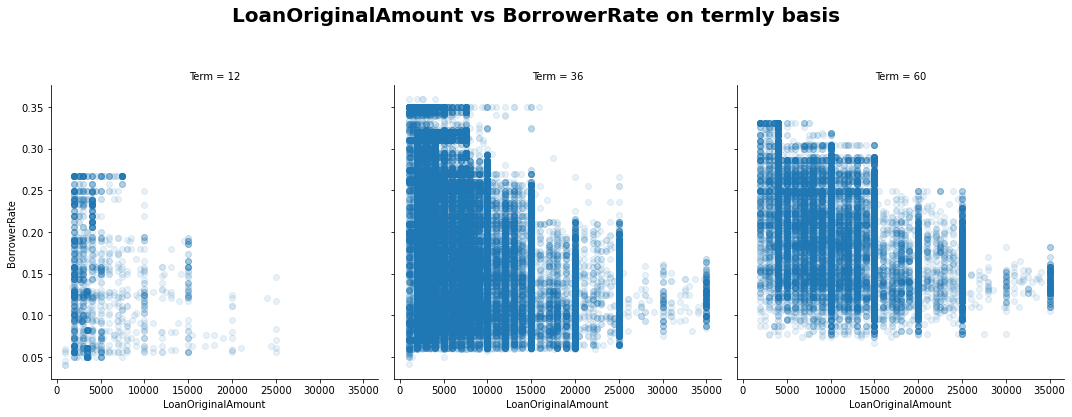

In [114]:
g = sns.FacetGrid(data = df_clean, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.1)
plt.suptitle('LoanOriginalAmount vs BorrowerRate on termly basis', y=(1.15), weight ='bold', fontsize =20)
plt.show();

> There is a negative correlation between LoanOriginalAmount & BorrowerRate across the 3 terms

### How does StatedMonthlyIncome correlate to BorrowerAPR on a termly basis?

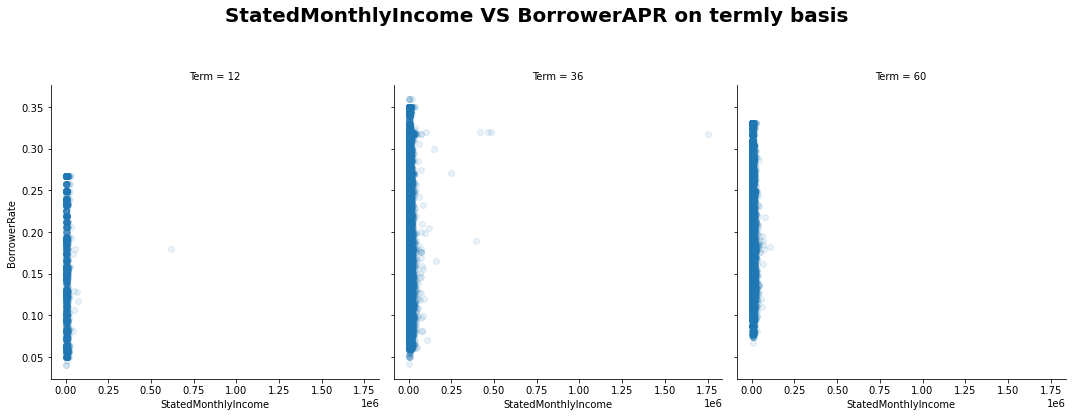

In [115]:
g = sns.FacetGrid(data = df_clean, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate', alpha=0.1)
plt.suptitle('StatedMonthlyIncome VS BorrowerAPR on termly basis', y=(1.15), weight ='bold', fontsize =20)
plt.show();

> There is a no correlation between StatedMonthlyIncome & BorrowerRate across the 3 terms.

### BorrowerAPR vs BorrowerRate vs ProsperRating_Alpha

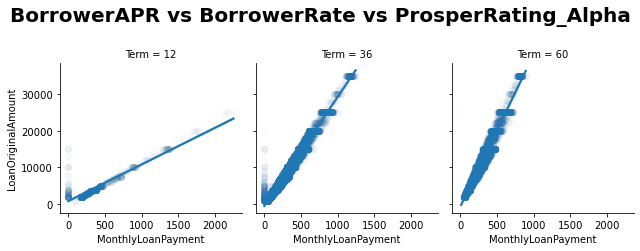

In [116]:
g = sns.FacetGrid(data = df_clean, col= 'Term', height = 3, margin_titles = True, col_wrap=3)
g.map(sns.regplot, 'MonthlyLoanPayment', 'LoanOriginalAmount', scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('BorrowerAPR vs BorrowerRate vs ProsperRating_Alpha', y=(1.15), weight ='bold', fontsize =20)
plt.show();

From the 3 visulizations it can be observed that there is indeed a good positive correlation between MonthlyLoanPayment and LoanOriginalAmount across the 3 terms, more stronger on 36 and 60 month terms. 

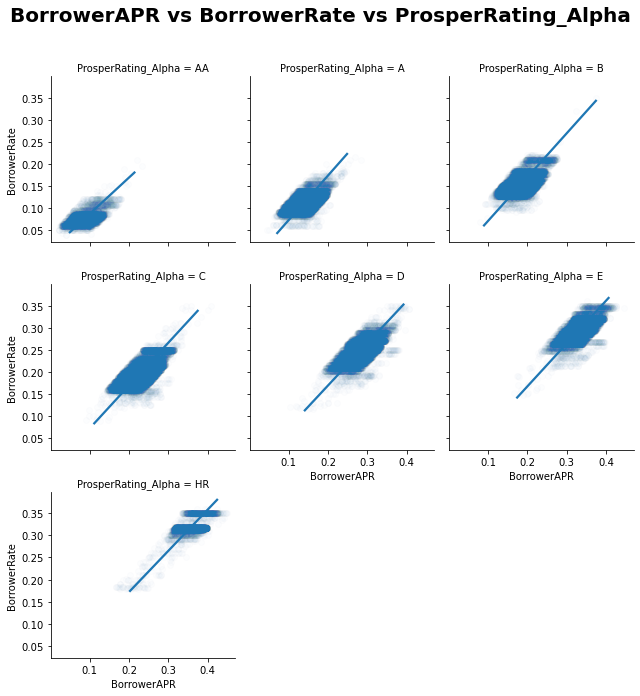

In [117]:
g = sns.FacetGrid(data = df_clean, col= 'ProsperRating_Alpha', height = 3, margin_titles = True, col_wrap=3, col_order = Prosper_order)
g.map(sns.regplot, 'BorrowerAPR', 'BorrowerRate', scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('BorrowerAPR vs BorrowerRate vs ProsperRating_Alpha', y=(1.07), weight ='bold', fontsize =20)
plt.show();

> Loan listings with high prosper ratings enjoy the benefit of lower borrower ratings

### BorrowerAPR and BorrowerRate vs LoanStatus

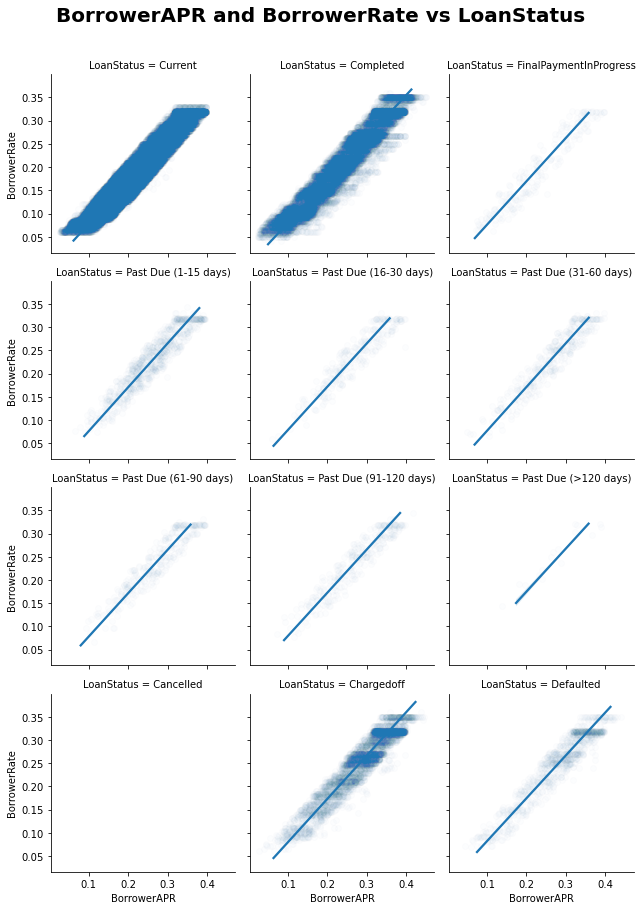

In [118]:
g = sns.FacetGrid(data = df_clean, col= 'LoanStatus', height = 3, margin_titles = True, col_wrap=3, col_order=Status_Order)
g.map(sns.regplot, 'BorrowerAPR', 'BorrowerRate', scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('BorrowerAPR and BorrowerRate vs LoanStatus', y=(1.05), weight ='bold', fontsize =20)
plt.show()

### StatedMonthlyIncome and LoanOriginalAmount vs LoanStatus

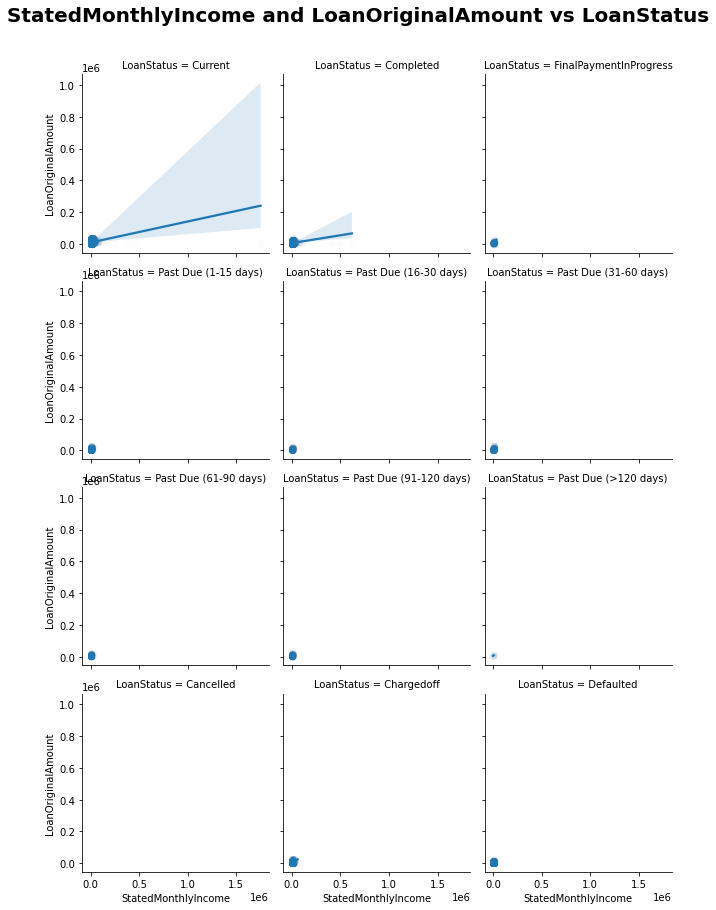

In [119]:
g = sns.FacetGrid(data = df_clean, col= 'LoanStatus', height = 3, margin_titles = True, col_wrap=3, col_order=Status_Order)
g.map(sns.regplot,  'StatedMonthlyIncome', 'LoanOriginalAmount',scatter_kws={'alpha': 0.01}, x_jitter=0.4)
plt.suptitle('StatedMonthlyIncome and LoanOriginalAmount vs LoanStatus', y=(1.05), weight ='bold', fontsize =20)
plt.show()

> The loan original amount is positively correlated with the stated monthly income as observed in the current loan listings.

### LoanOriginalAmount vs BorrowerRate vs LoanStatus

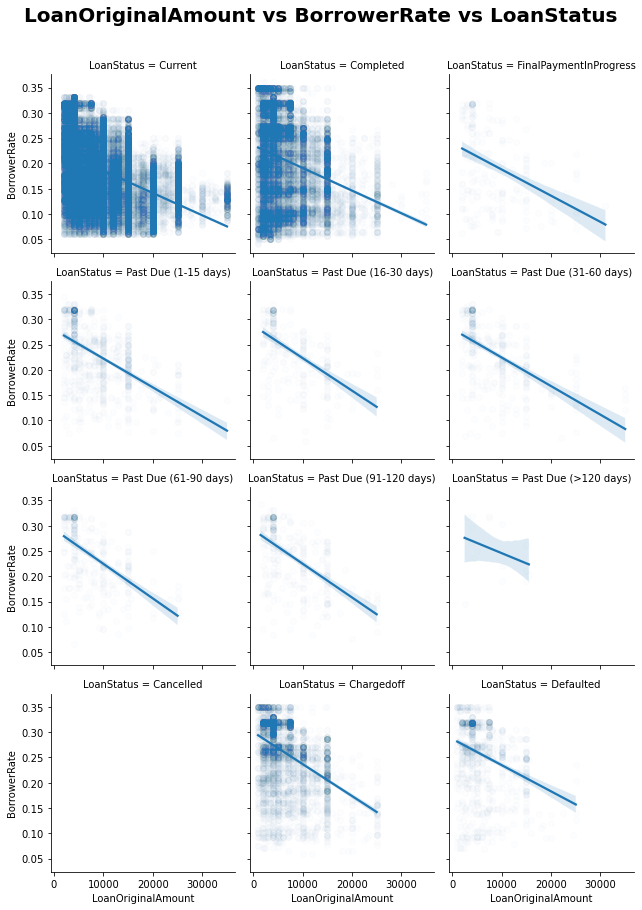

In [120]:
g = sns.FacetGrid(data = df_clean, col= 'LoanStatus', height = 3, margin_titles = True, col_wrap=3, col_order=Status_Order)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('LoanOriginalAmount vs BorrowerRate vs LoanStatus', y=(1.05), weight ='bold', fontsize =20)
plt.show()

> A negative correlation among the variables is observed with borrower rate decreasing as the loan original amount increases across all loan status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A positive correlation between Borrower APR and Borrower Rate across the three terms (12 months, 36 months and 60 month) was observed. 

### Were there any interesting or surprising interactions between features?

> prosper ratings can influence loan approval and may be the reason for defaulting of loan payments

# CONCLUSIONS
### Main findings
1. 2013 recorded the highest number of loan listings
2. Carlifornia recorded the highest number of loan listings
3. Top 5 earning occupation on a monthly basis are : doctor, attorney, executive, judge and dentist
4. 66.5% of the loan listings are current, with 3.8% making up the defaulted and overdue loans
5. Most borrowers settle for the 36 month term to settle the loan
6. Most people took the loans for Debt Consolidation on a 36 month loan term.
7. Borrowers who are Employed, Full-Time are offered the minimum Interest Rate.
8. There is a positive Correlation between Monthly Income and Prosper Score, suggesting that as your income increases the more credit worthy you are and become eligible for a loan.
9. Most of the defaulted and overdue loans are observed to be coming from listings with lower prosper ratings.

10. As the loan amount is increased with the increase of loan term, the borrowerRate decreases with the better prosperrating also. Borrowers with the best Prosper ratings have the lowest interest rates. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than others.

11. It can be observed that most of the Borrowers who are Employed either Full Time/Part Time, have a higher range of Prosper Scores when compared to Borrowers who are Not Employed.Borrowers who are Retired, have also have a similar range of Prosper Scores to Borrowers who are employed Part-Time.
